In [1]:
import mcmc_utils

In [2]:
import surp
import vice
import numpy as np

import matplotlib.pyplot as plt

from surp.gce_math import Z_to_MH, MH_to_Z, calc_y

/users/PAS2232/aeyobd/VICE/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


In [3]:
from singlezone import run_singlezone

In [4]:
surp.set_yields()

yields set to Magg et al. 2022 abundances
Yield settings
X        Z_solar    CC                             agb                            SN Ia                          

c        3.39e-03   2.28e-03 + 8.14e-01 (Z - Z0)   1.00 × cristallo11             0                              

n        1.04e-03   5.00e-04                       5.02e-04 M Z/Z0                0                              

o        7.33e-03   7.13e-03                       0                              0                              

mg       6.71e-04   6.52e-04                       0                              0                              

fe       1.37e-03   4.73e-04                       0                              7.70e-04                       





In [5]:
def agb_interpolator(ele, study):
    return surp.agb_interpolator.interpolator(ele, study=study)

In [6]:
vice.yields.ccsne.settings["c"] = 0

for model in surp.AGB_MODELS:
    vice.yields.agb.settings["c"] = agb_interpolator("c", study=model)
    sz, h = run_singlezone()
    print(model)
    print(h['z(c)'].iloc[-1])

/users/PAS2232/aeyobd/VICE/vice/core/singlezone/singlezone.py:1797: VisibleRuntimeWarning: Functions of stellar mass and metallicity for asymptotic giant branch star yields may significantly increase the required integration time, especially for fine timestepping.
  return self.__c_version.run(output_times, capture = capture,
/users/PAS2232/aeyobd/VICE/vice/core/pickles.py:305: UserWarning: Could not pickle function. The following attribute will not be saved with this output: c
  warnings.warn("""\
/users/PAS2232/aeyobd/VICE/vice/core/pickles.py:305: UserWarning: Could not pickle function. The following attribute will not be saved with this output: o
  warnings.warn("""\
/users/PAS2232/aeyobd/VICE/vice/core/pickles.py:305: UserWarning: Could not pickle function. The following attribute will not be saved with this output: mg
  warnings.warn("""\
/users/PAS2232/aeyobd/VICE/vice/core/pickles.py:305: UserWarning: Could not pickle function. The following attribute will not be saved with thi

cristallo11
0.0004998073440034009


/users/PAS2232/aeyobd/VICE/vice/core/pickles.py:305: UserWarning: Could not pickle function. The following attribute will not be saved with this output: c
  warnings.warn("""\
/users/PAS2232/aeyobd/VICE/vice/core/pickles.py:305: UserWarning: Could not pickle function. The following attribute will not be saved with this output: o
  warnings.warn("""\
/users/PAS2232/aeyobd/VICE/vice/core/pickles.py:305: UserWarning: Could not pickle function. The following attribute will not be saved with this output: mg
  warnings.warn("""\
/users/PAS2232/aeyobd/VICE/vice/core/pickles.py:305: UserWarning: Could not pickle function. The following attribute will not be saved with this output: fe
  warnings.warn("""\
/users/PAS2232/aeyobd/VICE/vice/core/outputs/output.py:131: UserWarning: agb c yield not encoded with output. Assuming the current yield setting, which may not reflect the yield setting at the time the simulation was ran.
  self.__c_version = c_output(name)
/users/PAS2232/aeyobd/VICE/vice/core

ventura13
0.00036182390059341337


/users/PAS2232/aeyobd/VICE/vice/core/pickles.py:305: UserWarning: Could not pickle function. The following attribute will not be saved with this output: c
  warnings.warn("""\
/users/PAS2232/aeyobd/VICE/vice/core/pickles.py:305: UserWarning: Could not pickle function. The following attribute will not be saved with this output: o
  warnings.warn("""\
/users/PAS2232/aeyobd/VICE/vice/core/pickles.py:305: UserWarning: Could not pickle function. The following attribute will not be saved with this output: mg
  warnings.warn("""\
/users/PAS2232/aeyobd/VICE/vice/core/pickles.py:305: UserWarning: Could not pickle function. The following attribute will not be saved with this output: fe
  warnings.warn("""\
/users/PAS2232/aeyobd/VICE/vice/core/outputs/output.py:131: UserWarning: agb c yield not encoded with output. Assuming the current yield setting, which may not reflect the yield setting at the time the simulation was ran.
  self.__c_version = c_output(name)
/users/PAS2232/aeyobd/VICE/vice/core

karakas16
0.0005863470602916094
pignatari16
0.000791548576818738


/users/PAS2232/aeyobd/VICE/vice/core/pickles.py:305: UserWarning: Could not pickle function. The following attribute will not be saved with this output: c
  warnings.warn("""\
/users/PAS2232/aeyobd/VICE/vice/core/pickles.py:305: UserWarning: Could not pickle function. The following attribute will not be saved with this output: o
  warnings.warn("""\
/users/PAS2232/aeyobd/VICE/vice/core/pickles.py:305: UserWarning: Could not pickle function. The following attribute will not be saved with this output: mg
  warnings.warn("""\
/users/PAS2232/aeyobd/VICE/vice/core/pickles.py:305: UserWarning: Could not pickle function. The following attribute will not be saved with this output: fe
  warnings.warn("""\
/users/PAS2232/aeyobd/VICE/vice/core/outputs/output.py:131: UserWarning: agb c yield not encoded with output. Assuming the current yield setting, which may not reflect the yield setting at the time the simulation was ran.
  self.__c_version = c_output(name)
/users/PAS2232/aeyobd/VICE/vice/core

# Prior models

In [7]:
lin_model = mcmc_utils.Linear(beta0=[3e-4, 3e-4], beta1=[0, 6e-4], log_sigma=[-20, 1])
exp_model = mcmc_utils.Exponential(beta0=[3e-4, 3e-3], beta1=[0,2e-2], log_sigma=[-20, 1])
quad_model = mcmc_utils.Quadratic(beta0=[3e-4, 3e-4], beta1=[0, 3e-4], beta2=[0, 3e-4], log_sigma=[-20, 1])

In [8]:
N = 3_000
discard = 300

100%|██████████| 1000/1000 [00:09<00:00, 106.38it/s]


$\beta_0$ = 2.96e-04 + 3.12e-04 - 2.92e-04
$\beta_1$ = 2.46e-05 + 6.01e-04 - 5.87e-04
$\log(\sigma)$ = -1.99e+01 + 9.53e-01 - 9.27e-01


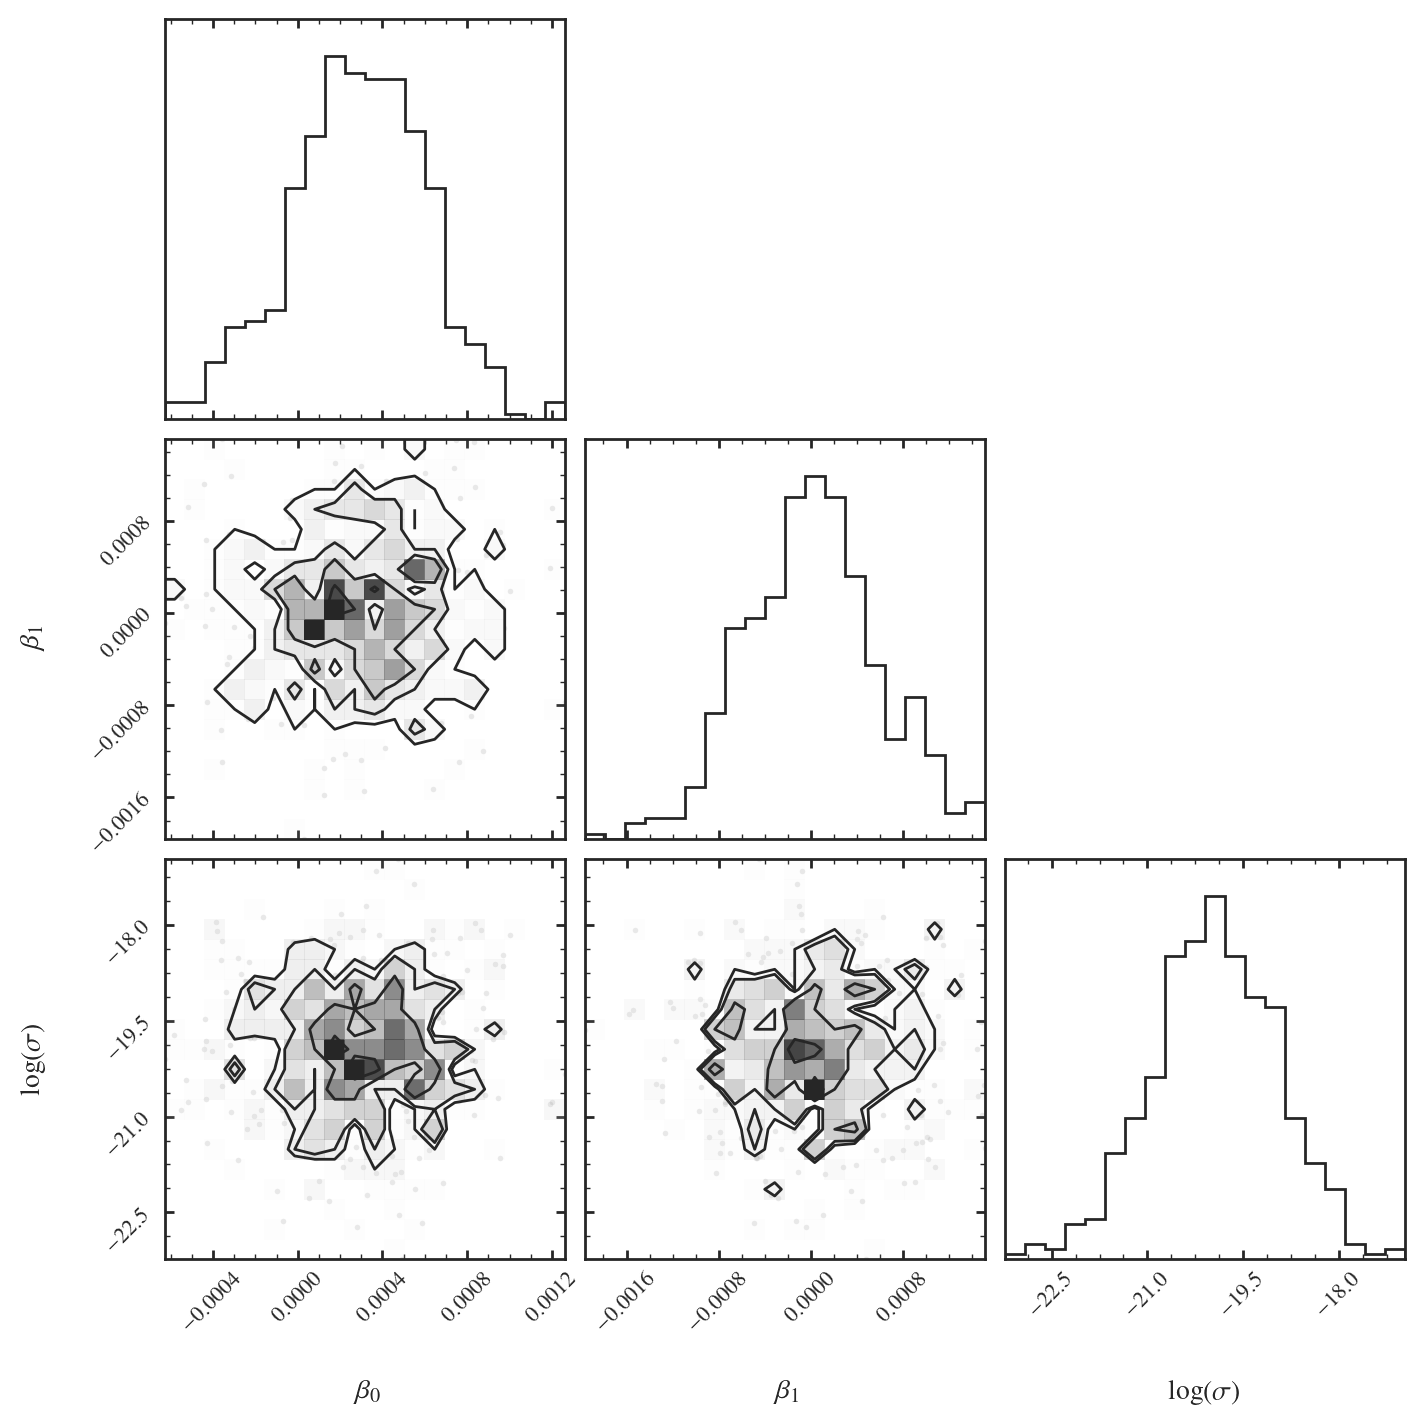

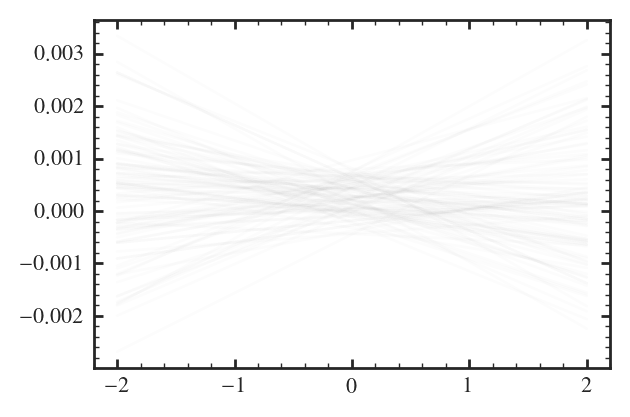

In [9]:
mcmc_utils.plot_prior(lin_model)

100%|██████████| 1000/1000 [00:09<00:00, 104.46it/s]


$\beta_0$ = 4.14e-04 + 3.05e-03 - 2.99e-03
$\beta_1$ = 6.19e-04 + 1.83e-02 - 2.02e-02
$\log(\sigma)$ = -2.00e+01 + 1.09e+00 - 9.71e-01


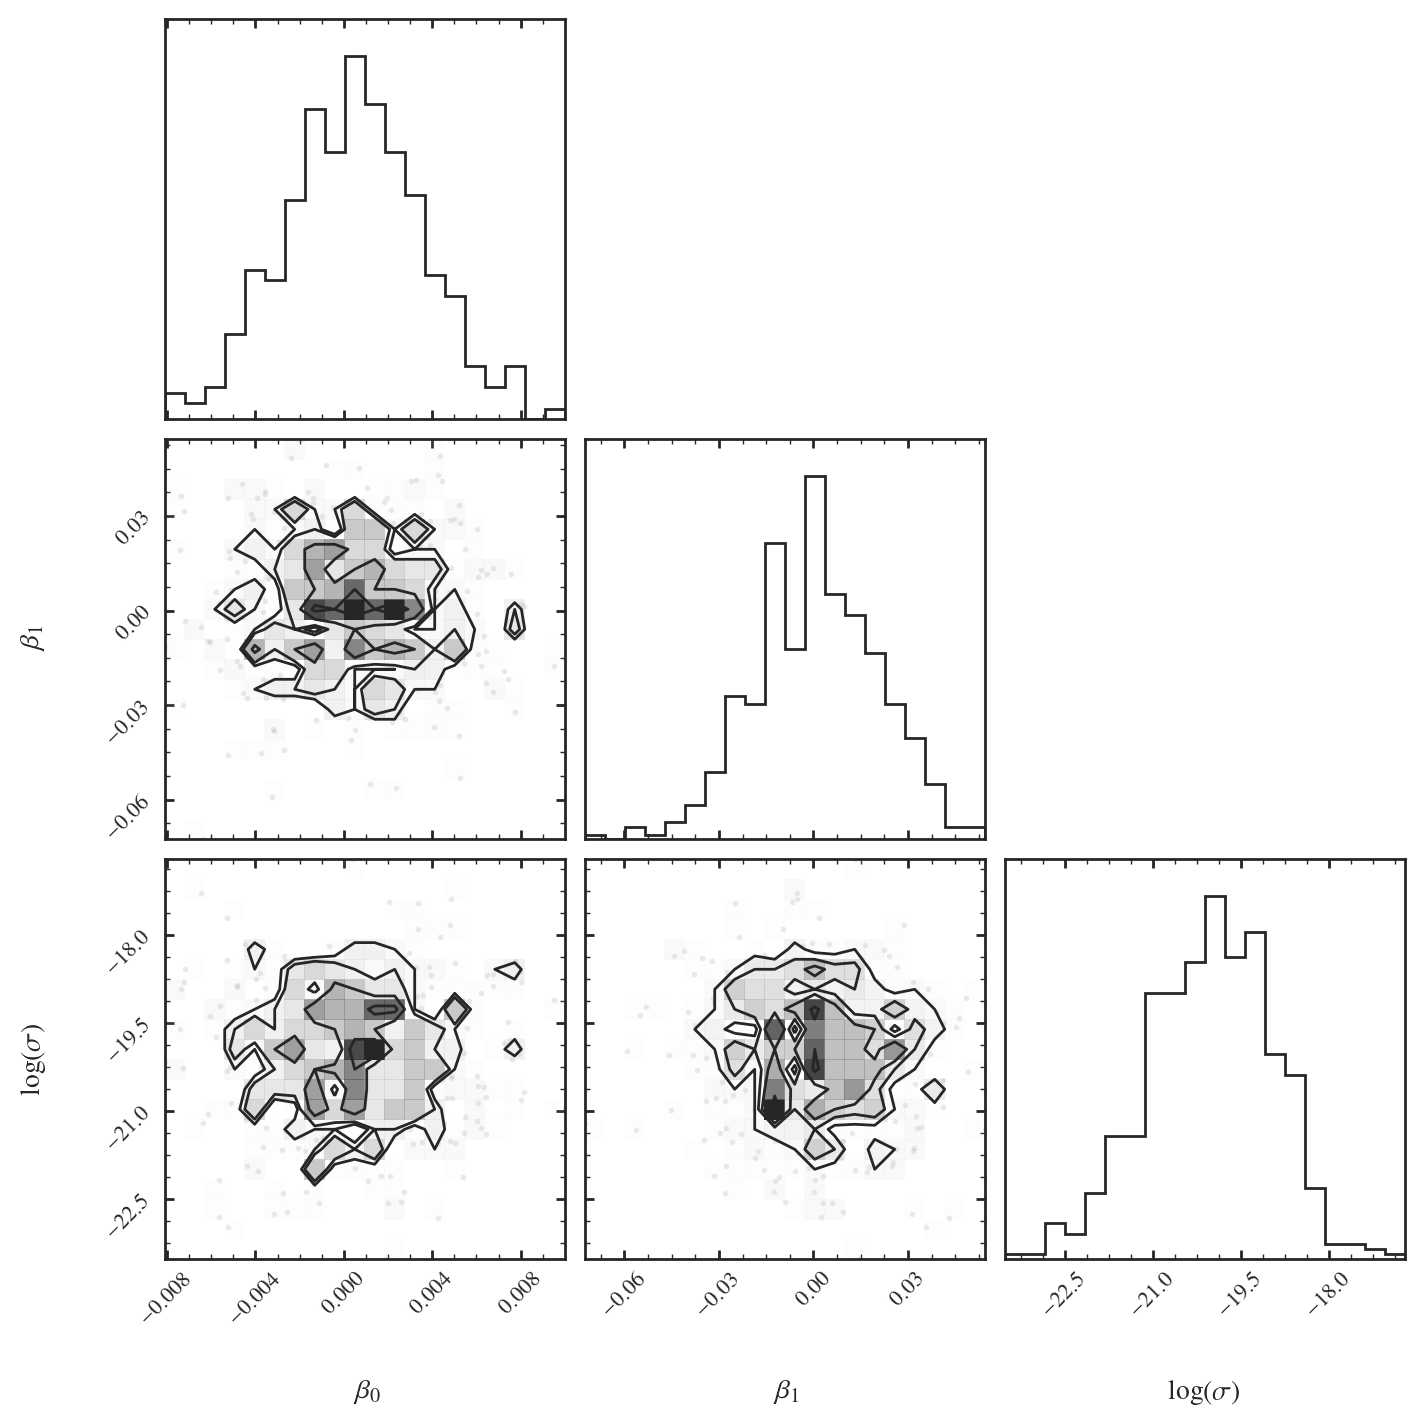

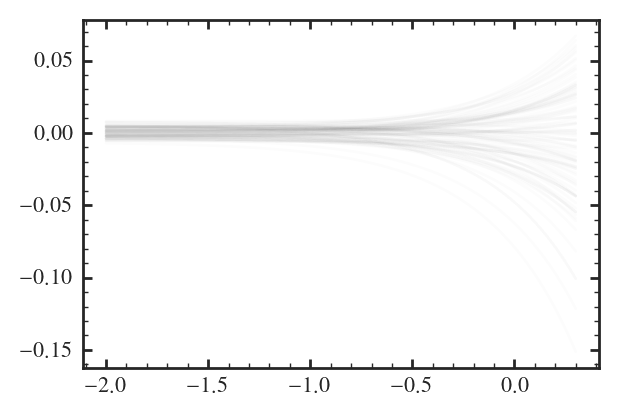

In [10]:
mcmc_utils.plot_prior(exp_model, xlims=(-2, 0.3))

100%|██████████| 1000/1000 [00:10<00:00, 98.70it/s]


$\beta_0$ = 3.52e-04 + 3.16e-04 - 2.76e-04
$\beta_1$ = -6.25e-05 + 3.00e-04 - 3.32e-04
$\beta_2$ = 1.11e-05 + 3.09e-04 - 2.71e-04
$\log(\sigma)$ = -2.01e+01 + 9.83e-01 - 9.50e-01


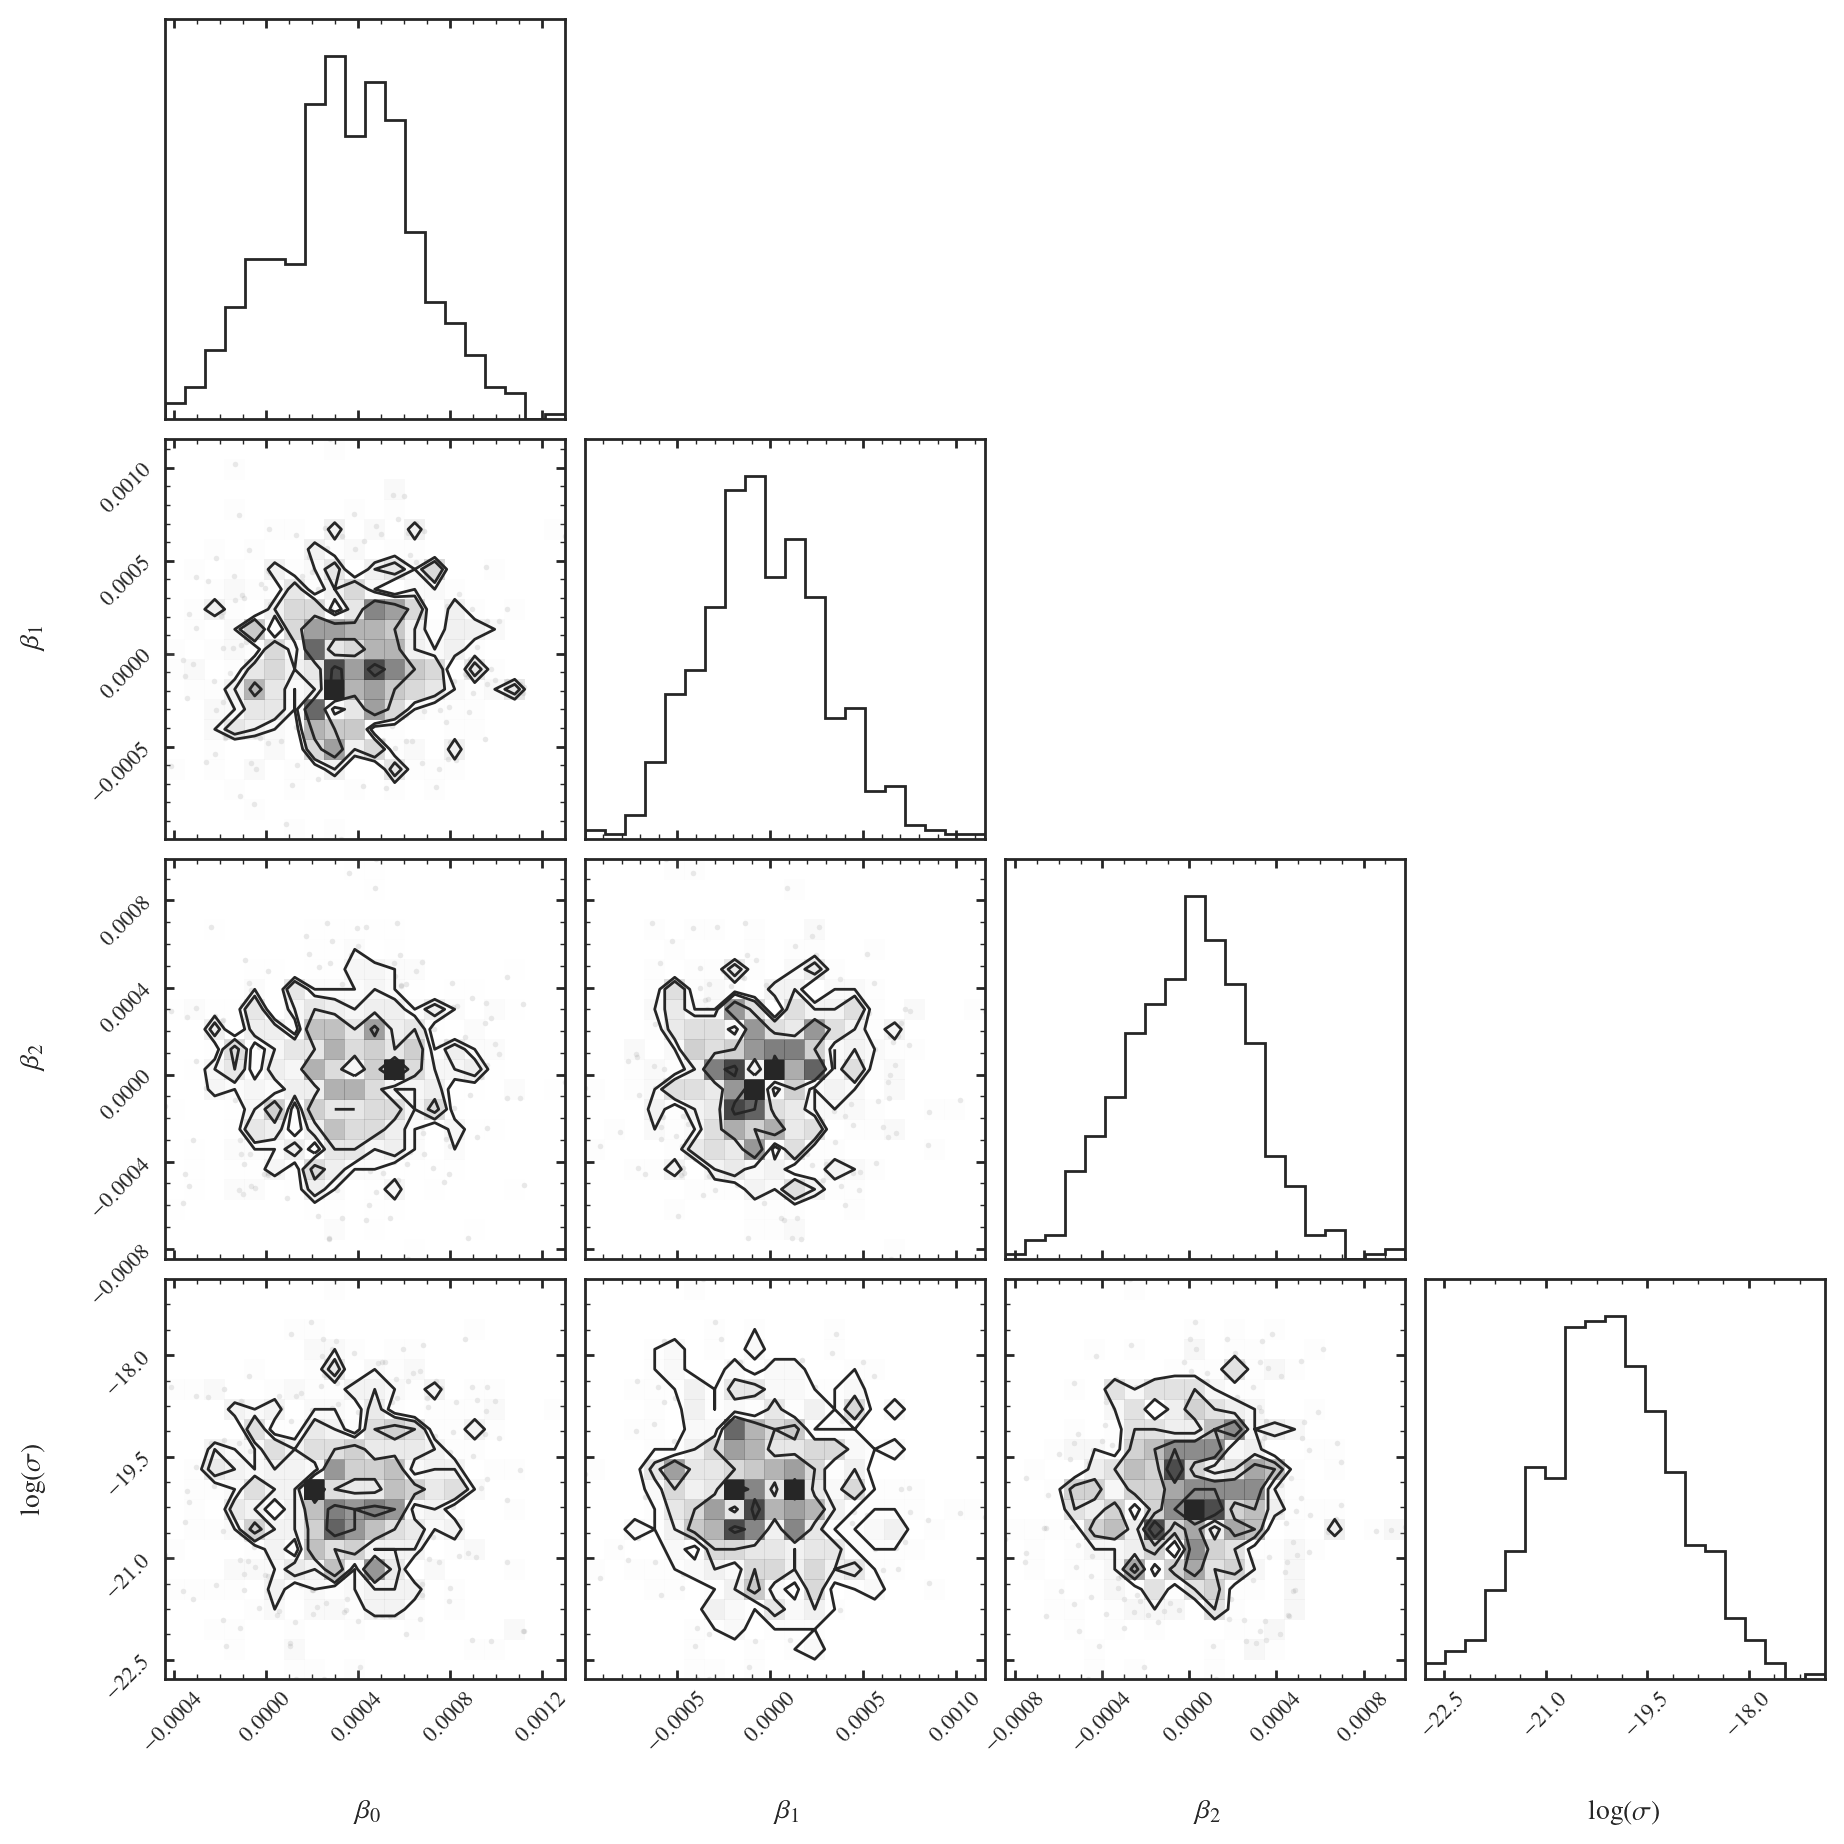

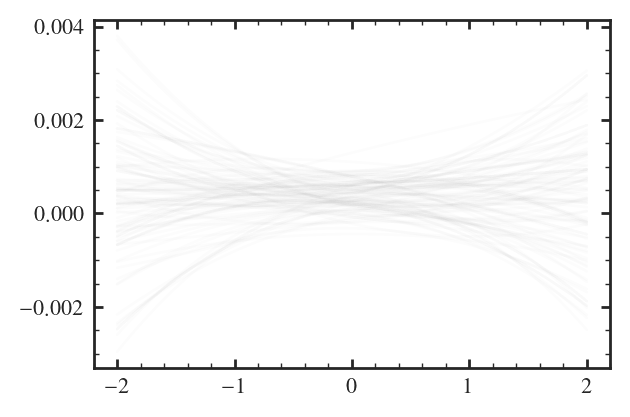

In [11]:
mcmc_utils.plot_prior(quad_model)

# Fit to the yield tables

In [12]:
def get_yield_table(study):
    y1, m1, z1 = vice.yields.agb.grid("c", study=study)
    mh1 = Z_to_MH(z1)
    vice.yields.agb.settings["c"] = agb_interpolator("c", study=study)
    y_c_agb1 = np.array([calc_y(z) for z in z1])

    return mh1, y_c_agb1, None, None

In [13]:
obs = get_yield_table("cristallo11")

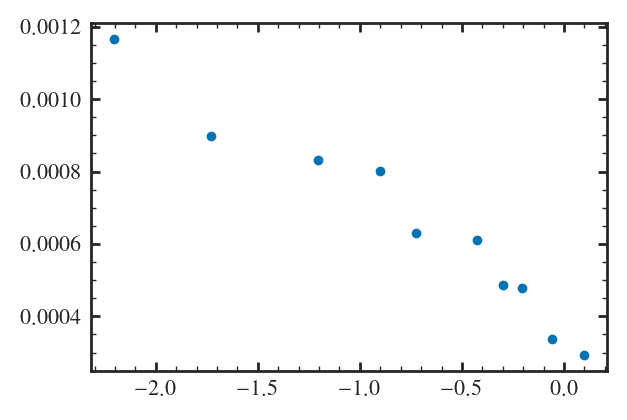

In [14]:
plt.scatter(obs[0], obs[1])

100%|██████████| 3000/3000 [00:08<00:00, 340.63it/s]


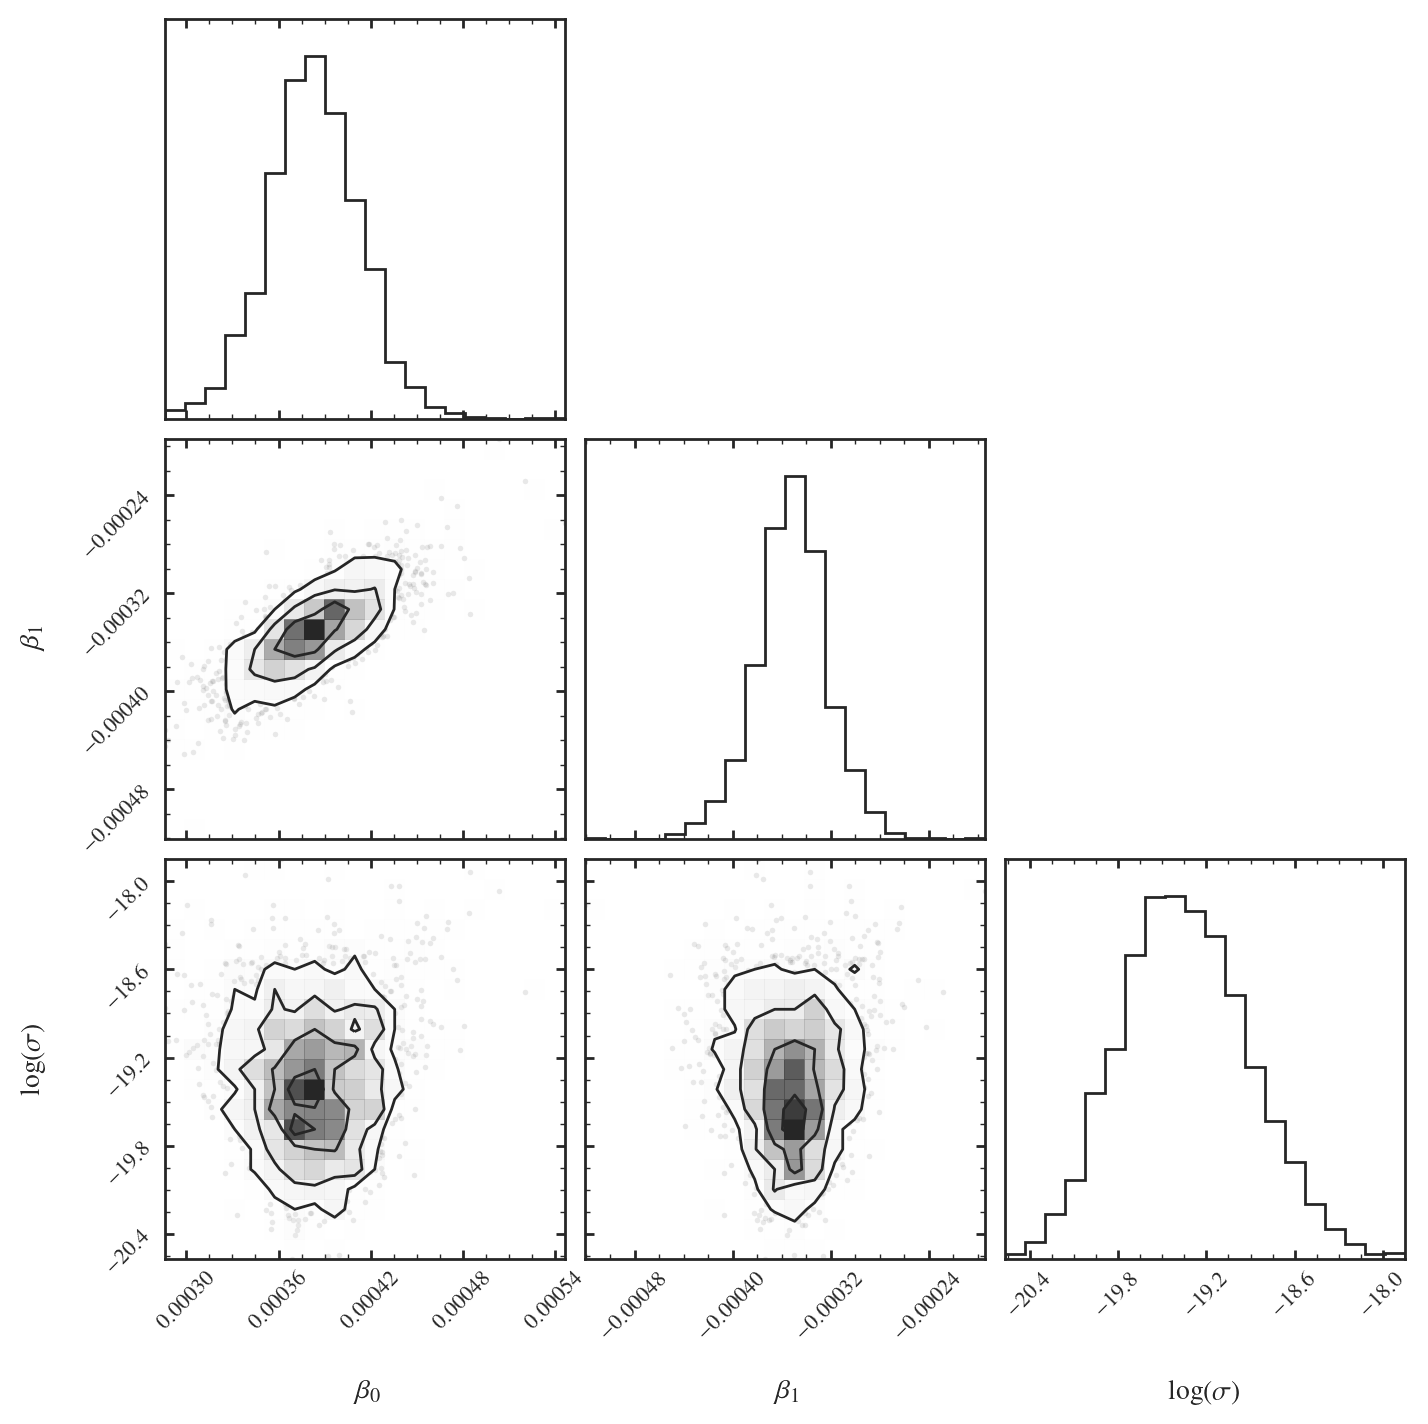

In [15]:
samples = mcmc_utils.run_mcmc(lin_model, obs, N=N, discard=discard)

$\beta_0$ = 3.82e-04 + 2.74e-05 - 2.90e-05
$\beta_1$ = -3.52e-04 + 2.75e-05 - 2.69e-05
$\log(\sigma)$ = -1.94e+01 + 4.12e-01 - 4.56e-01


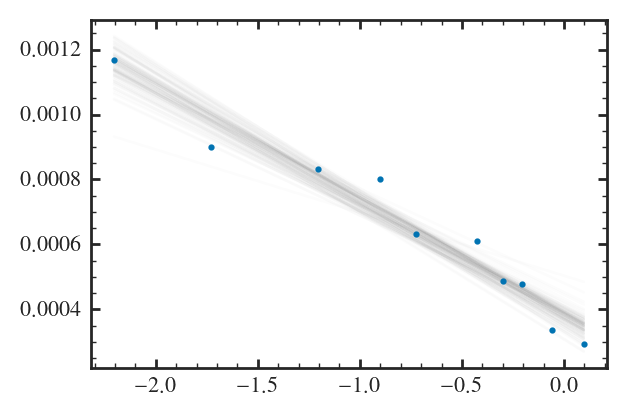

In [16]:
mcmc_utils.plot_posterior(lin_model, obs, samples)

100%|██████████| 3000/3000 [00:11<00:00, 268.40it/s]


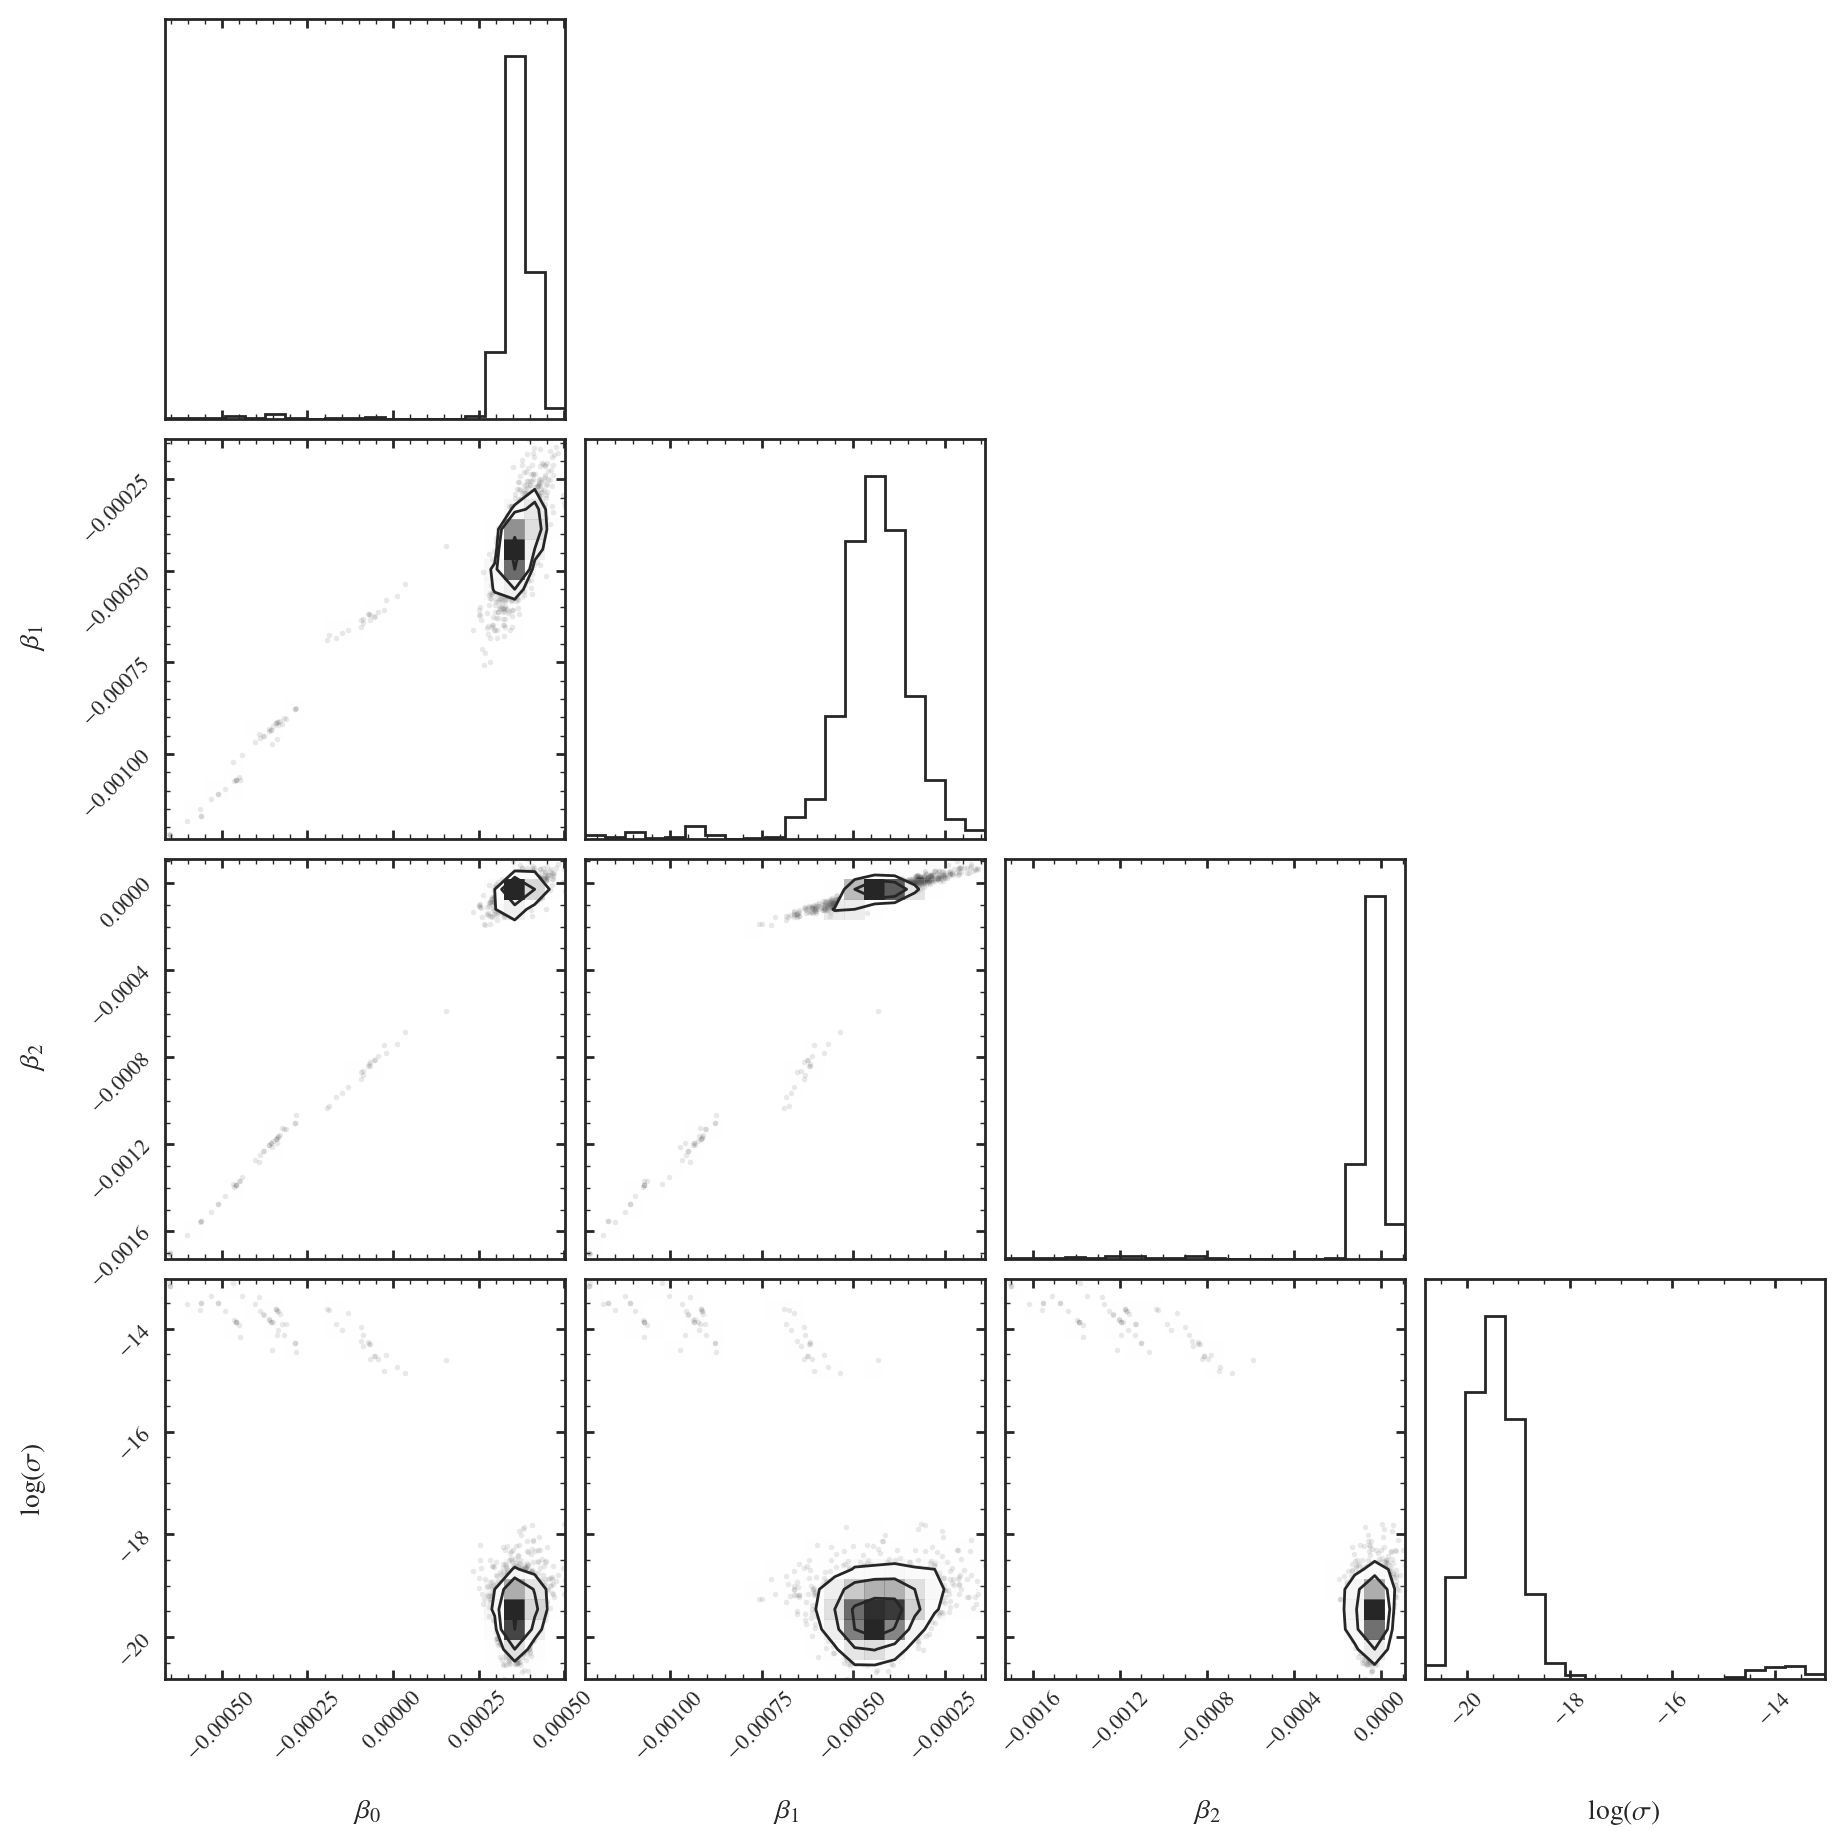

In [17]:
samples = mcmc_utils.run_mcmc(quad_model, obs, N=N, discard=discard)

$\beta_0$ = 3.64e-04 + 3.62e-05 - 3.29e-05
$\beta_1$ = -4.41e-04 + 8.11e-05 - 8.25e-05
$\beta_2$ = -4.53e-05 + 3.86e-05 - 4.01e-05
$\log(\sigma)$ = -1.95e+01 + 4.50e-01 - 4.93e-01


(-0.0003, 0.002)

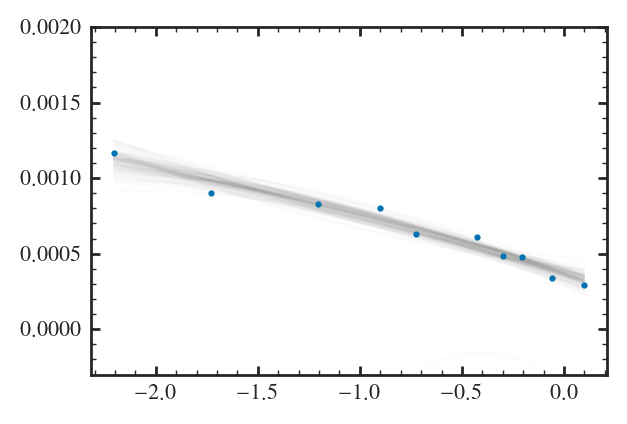

In [18]:
mcmc_utils.plot_posterior(quad_model, obs, samples)
plt.ylim(-0.3e-3, 2e-3)

100%|██████████| 3000/3000 [00:08<00:00, 333.90it/s]


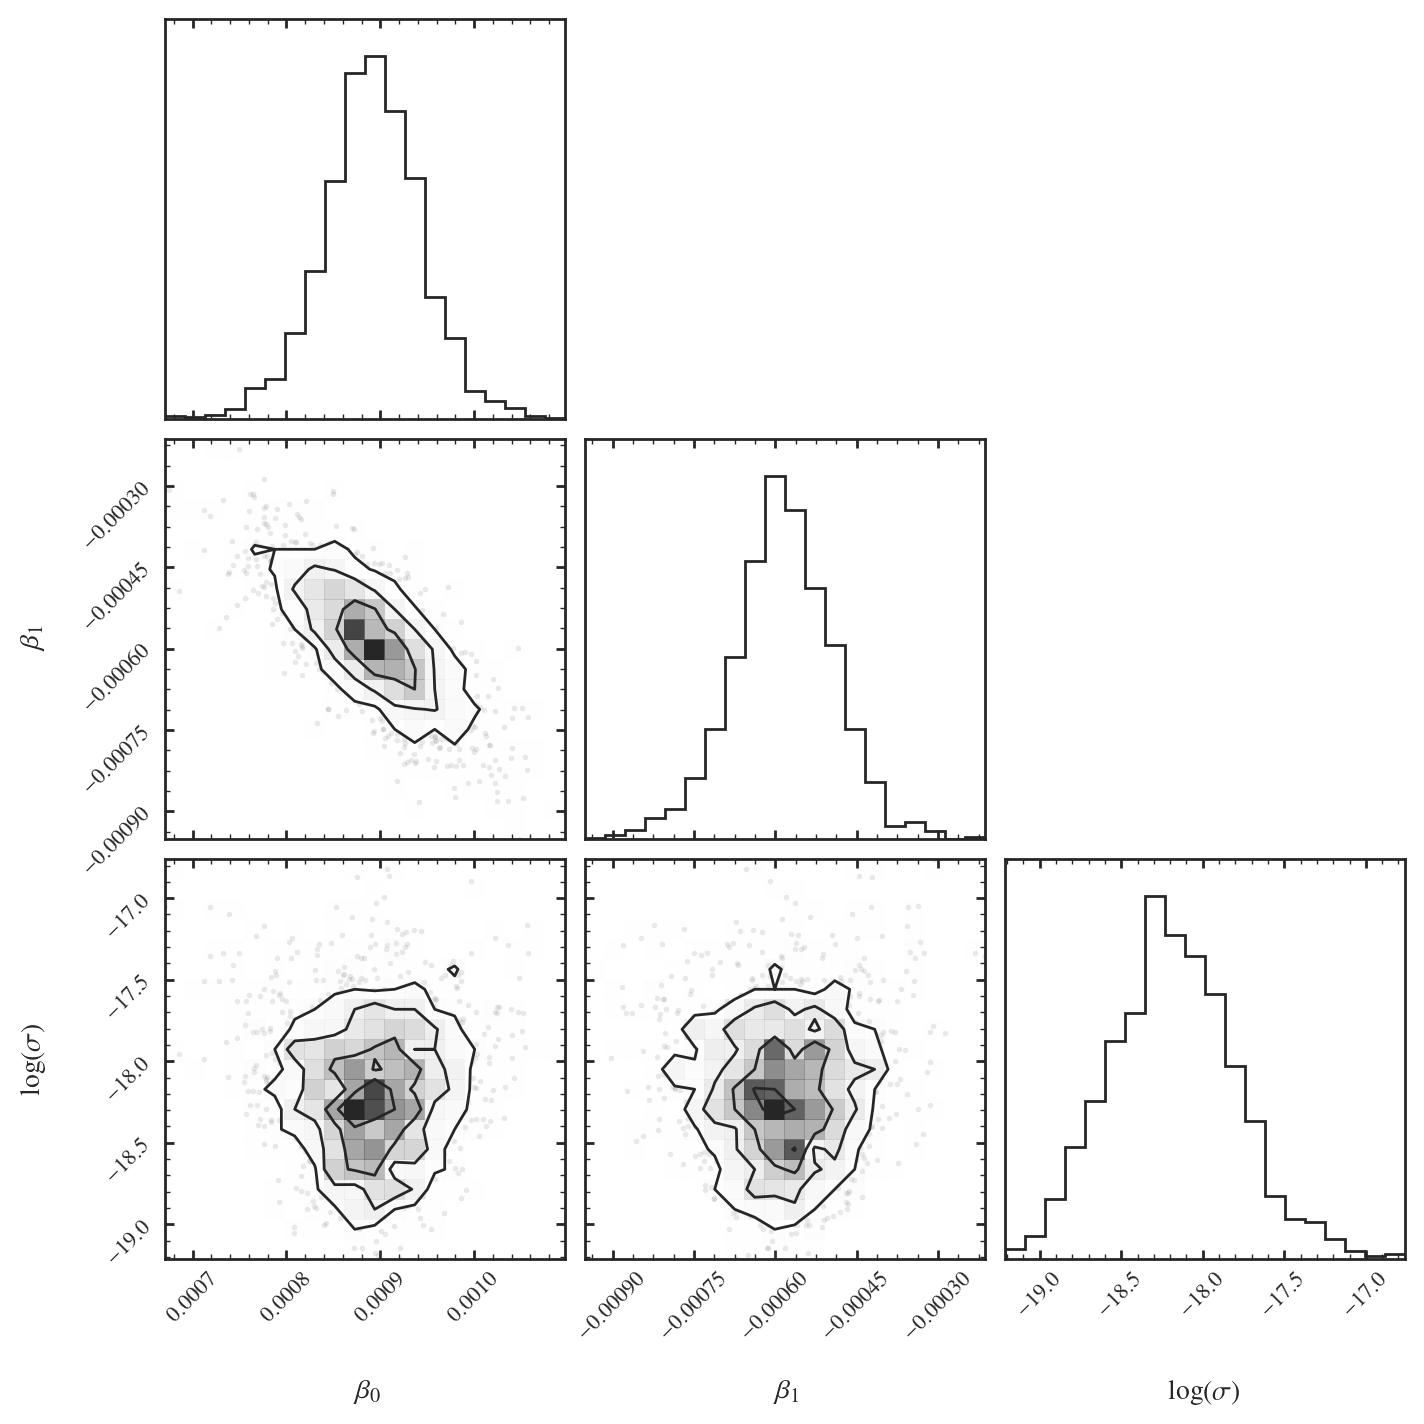

In [19]:
samples = mcmc_utils.run_mcmc(exp_model, obs, N=N, discard=discard)

$\beta_0$ = 8.91e-04 + 4.85e-05 - 4.93e-05
$\beta_1$ = -5.88e-04 + 8.42e-05 - 9.11e-05
$\log(\sigma)$ = -1.82e+01 + 3.77e-01 - 3.85e-01


(-0.001, 0.002)

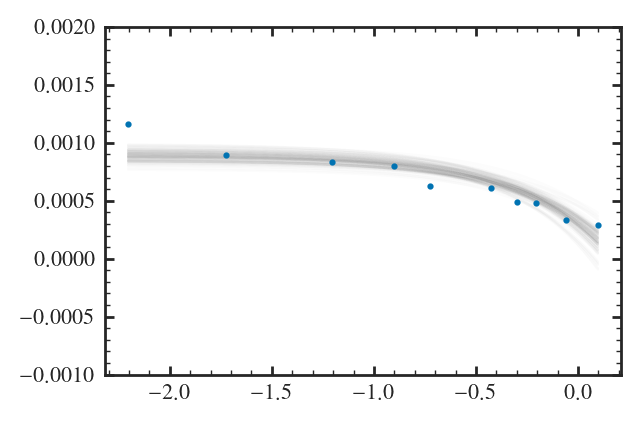

In [20]:
mcmc_utils.plot_posterior(exp_model, obs, samples)
plt.ylim(-1e-3, 2e-3)

# V13

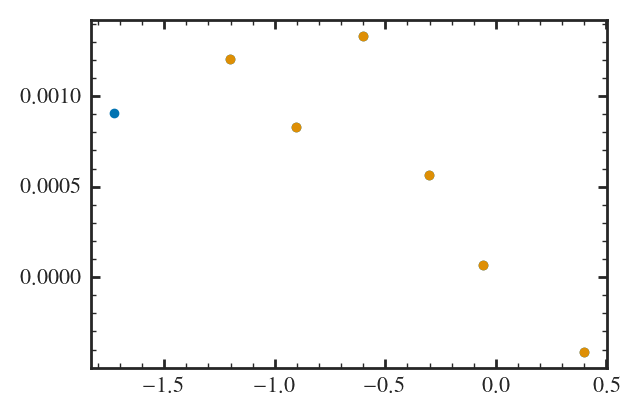

In [21]:
obs = get_yield_table("ventura13")

plt.scatter(obs[0], obs[1])
obs = list(obs)
obs[0] = obs[0][1:]
obs[1] = obs[1][1:]
plt.scatter(obs[0], obs[1])


100%|██████████| 3000/3000 [00:08<00:00, 335.39it/s]


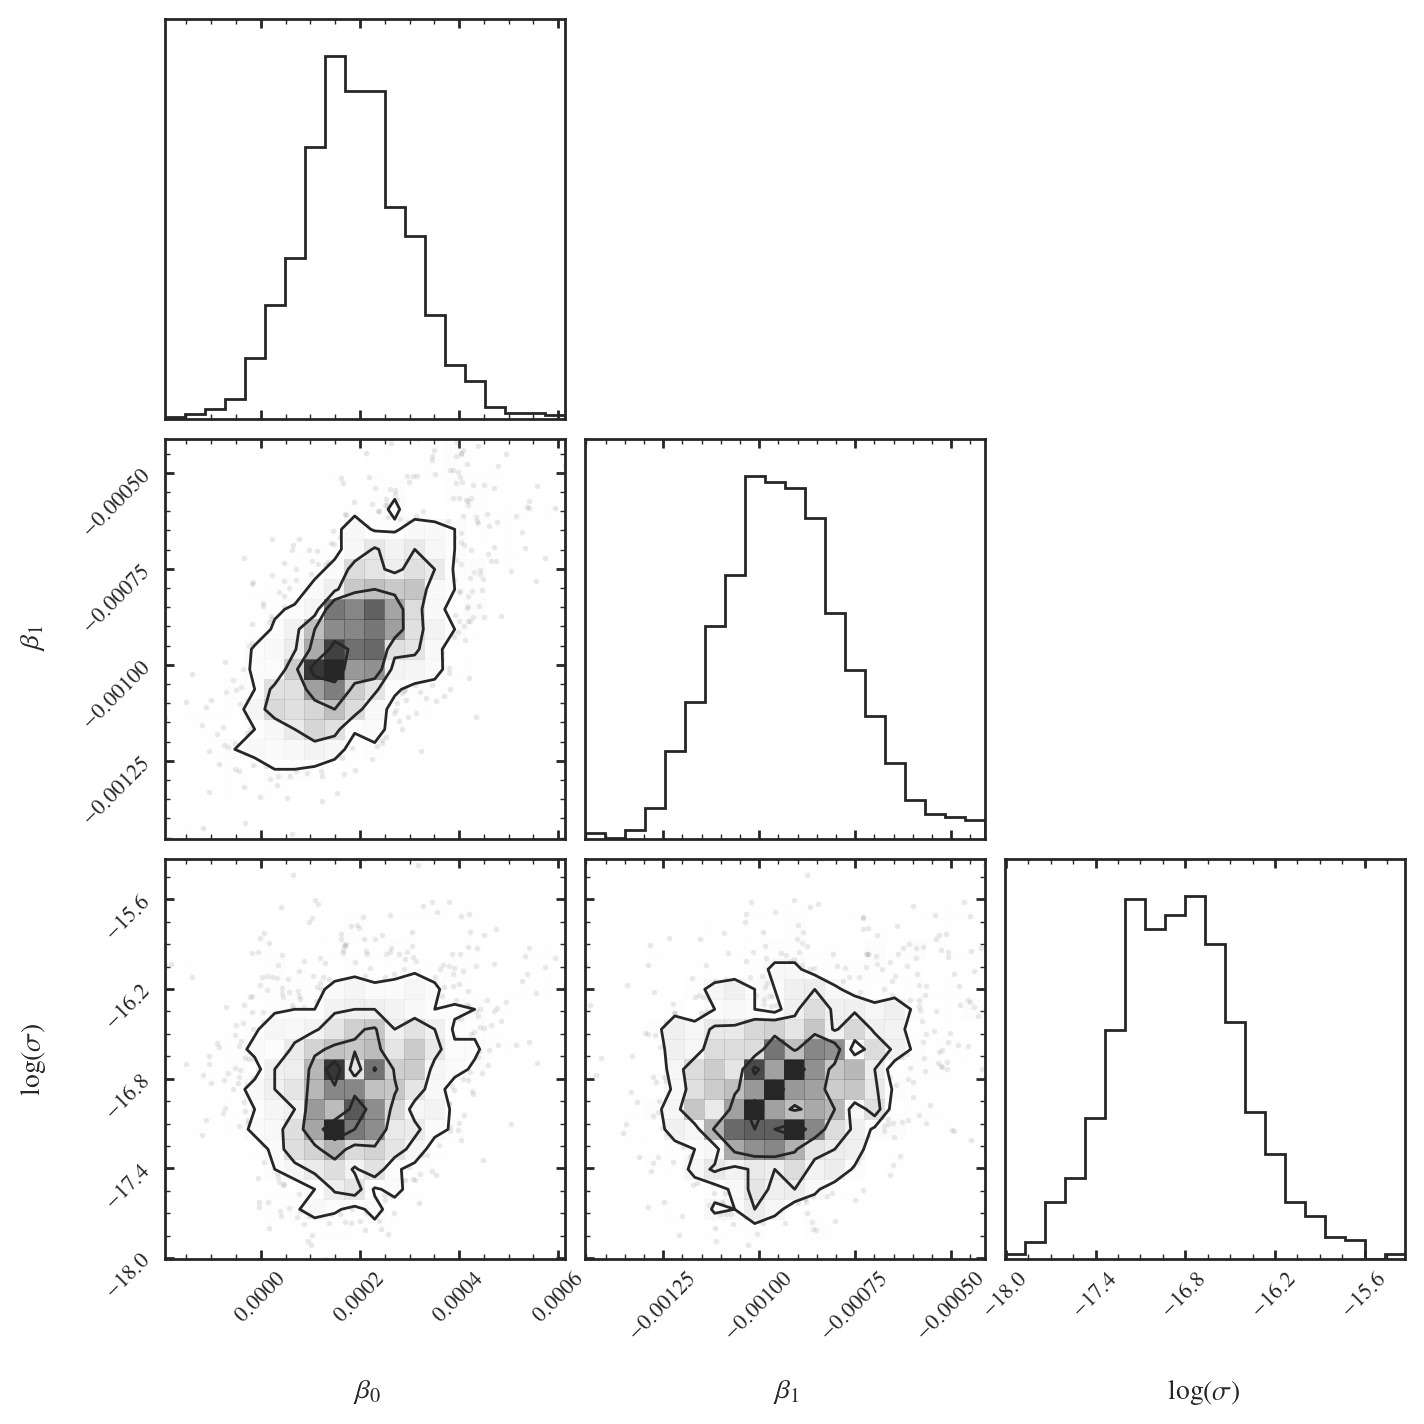

In [22]:
samples = mcmc_utils.run_mcmc(lin_model, obs, N=N, discard=discard)

$\beta_0$ = 1.85e-04 + 9.77e-05 - 1.12e-04
$\beta_1$ = -9.43e-04 + 1.54e-04 - 1.70e-04
$\log(\sigma)$ = -1.69e+01 + 3.95e-01 - 4.15e-01


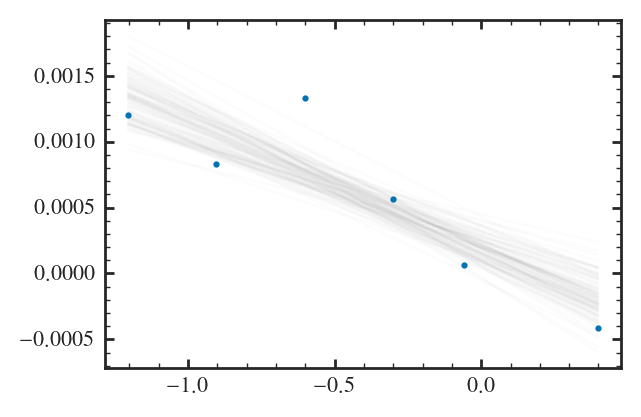

In [23]:
mcmc_utils.plot_posterior(lin_model, obs, samples)

$\beta_0$ = 1.85e-04 + 9.77e-05 - 1.12e-04
$\beta_1$ = -9.43e-04 + 1.54e-04 - 1.70e-04
$\log(\sigma)$ = -1.69e+01 + 3.95e-01 - 4.15e-01


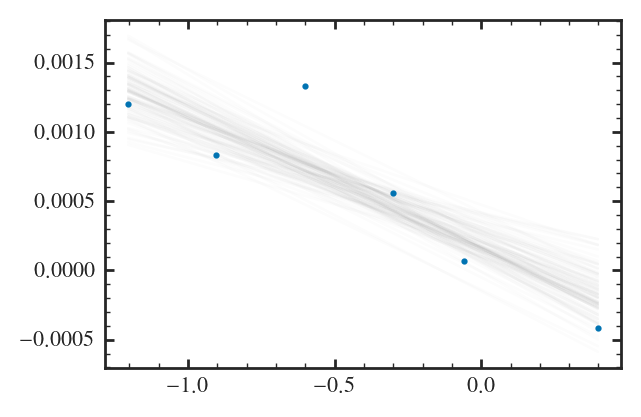

In [24]:
mcmc_utils.plot_posterior(lin_model, obs, samples)

100%|██████████| 3000/3000 [00:11<00:00, 270.56it/s]


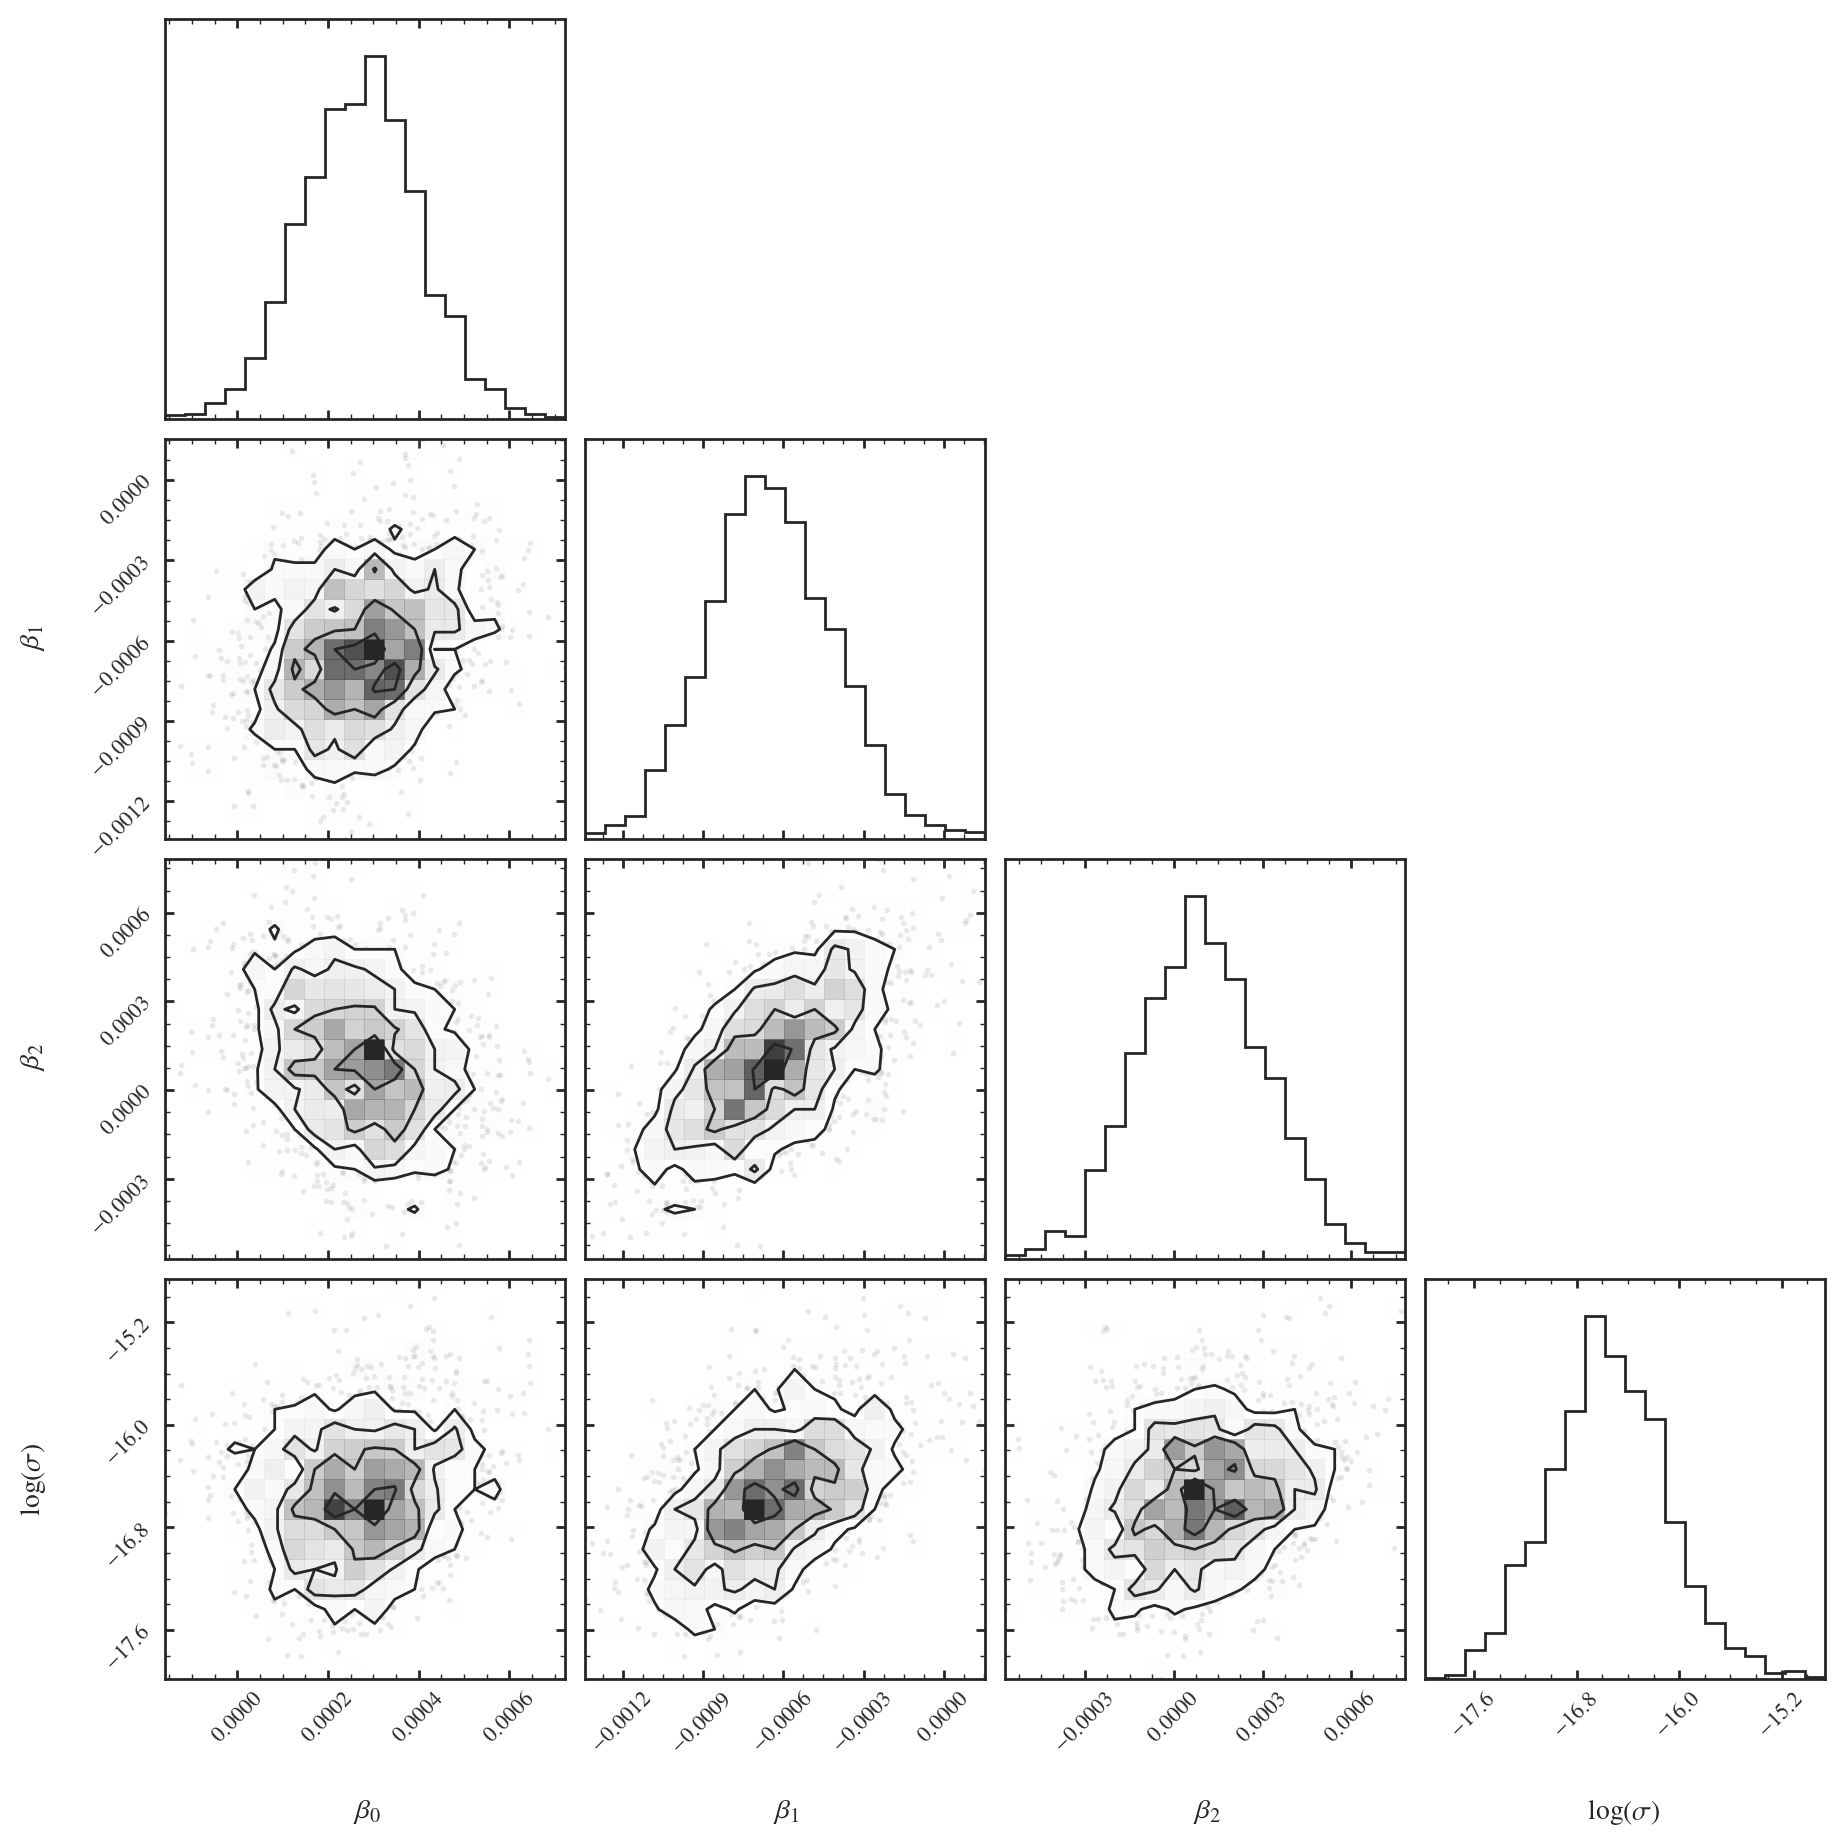

In [25]:
samples = mcmc_utils.run_mcmc(quad_model, obs, N=N, discard=discard)

$\beta_0$ = 2.75e-04 + 1.31e-04 - 1.21e-04
$\beta_1$ = -6.49e-04 + 2.20e-04 - 2.44e-04
$\beta_2$ = 9.00e-05 + 2.10e-04 - 2.29e-04
$\log(\sigma)$ = -1.66e+01 + 4.43e-01 - 4.47e-01


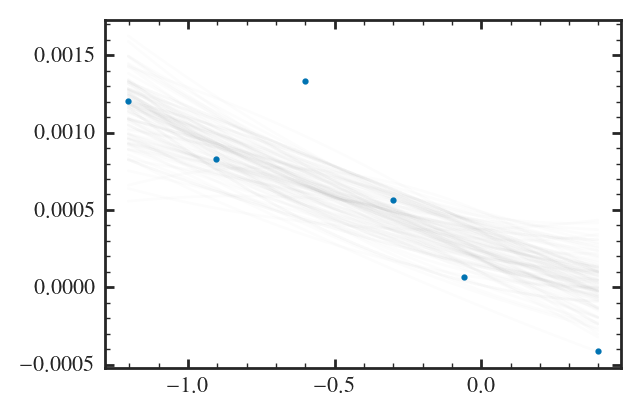

In [26]:
mcmc_utils.plot_posterior(quad_model, obs, samples)

100%|██████████| 3000/3000 [00:09<00:00, 328.18it/s]


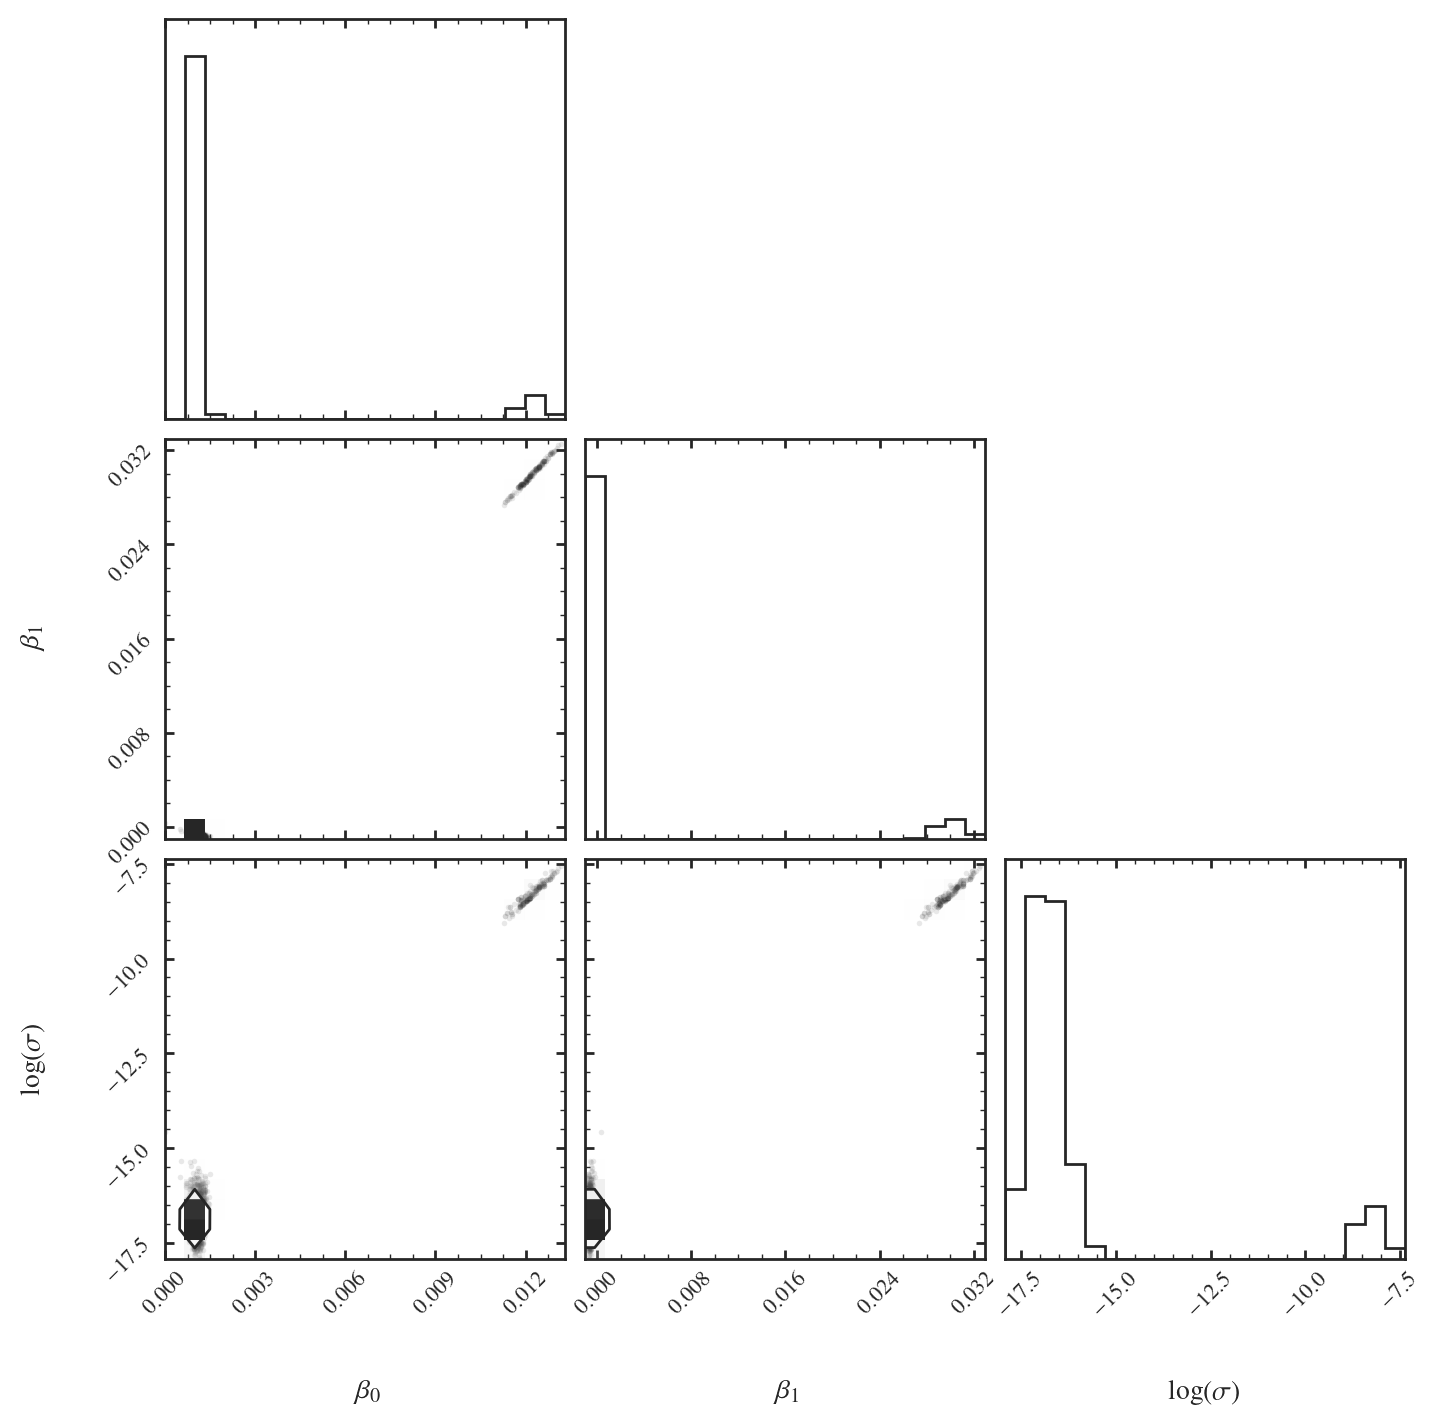

In [27]:
samples = mcmc_utils.run_mcmc(exp_model, obs, N=N, discard=discard)

$\beta_0$ = 1.07e-03 + 1.22e-04 - 1.69e-04
$\beta_1$ = -6.24e-04 + 1.13e-04 - 1.41e-04
$\log(\sigma)$ = -1.68e+01 + 4.18e-01 - 6.20e-01


(-0.001, 0.002)

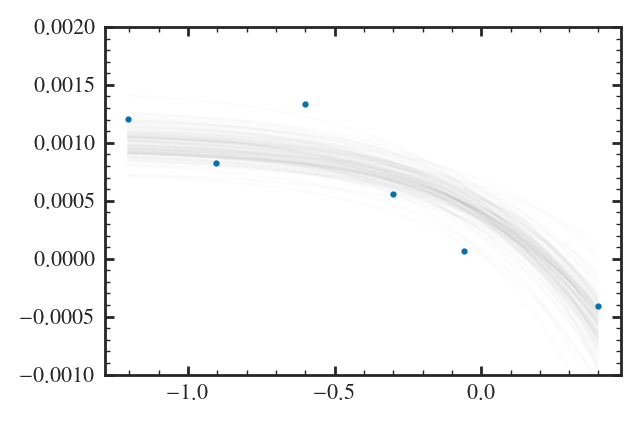

In [28]:
mcmc_utils.plot_posterior(exp_model, obs, samples)
plt.ylim(-1e-3, 2e-3)

# K16

In [29]:
obs = get_yield_table("karakas16")

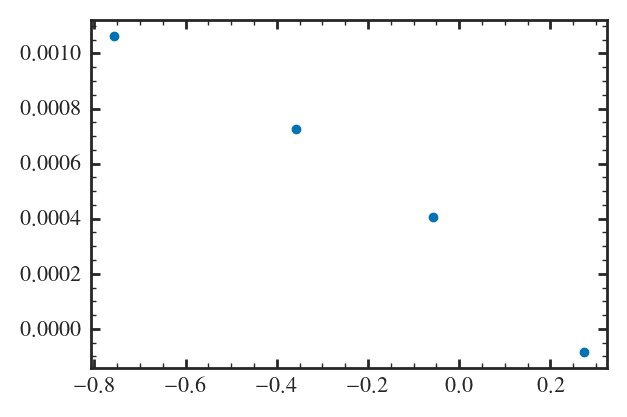

In [30]:
plt.scatter(obs[0], obs[1])

100%|██████████| 3000/3000 [00:09<00:00, 331.38it/s]


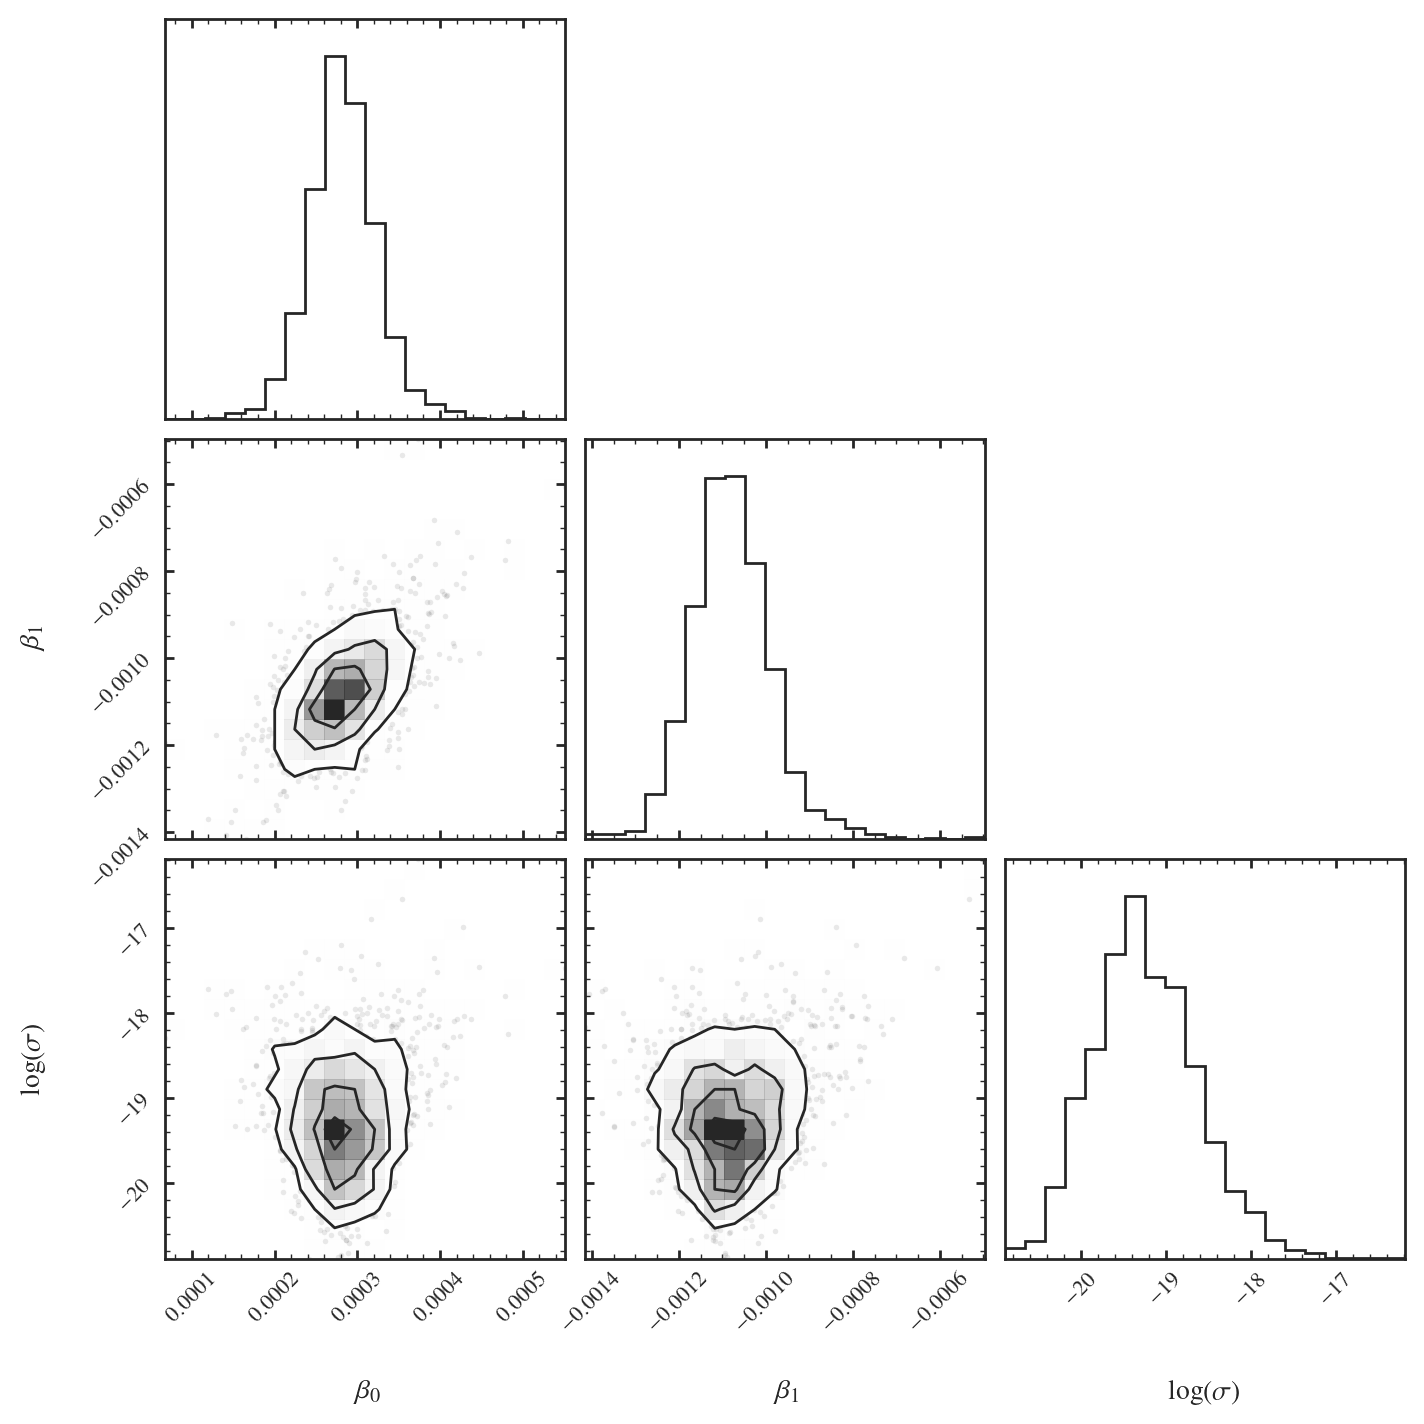

In [31]:
samples = mcmc_utils.run_mcmc(lin_model, obs, N=N, discard=discard)

$\beta_0$ = 2.81e-04 + 3.61e-05 - 3.85e-05
$\beta_1$ = -1.08e-03 + 8.39e-05 - 8.74e-05
$\log(\sigma)$ = -1.93e+01 + 5.39e-01 - 6.47e-01


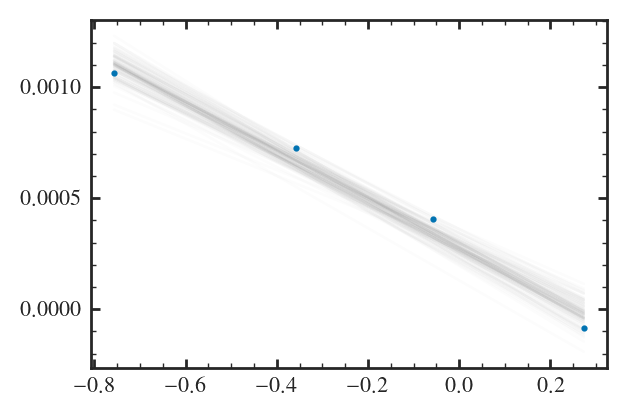

In [32]:
mcmc_utils.plot_posterior(lin_model, obs, samples)

100%|██████████| 3000/3000 [00:11<00:00, 263.67it/s]


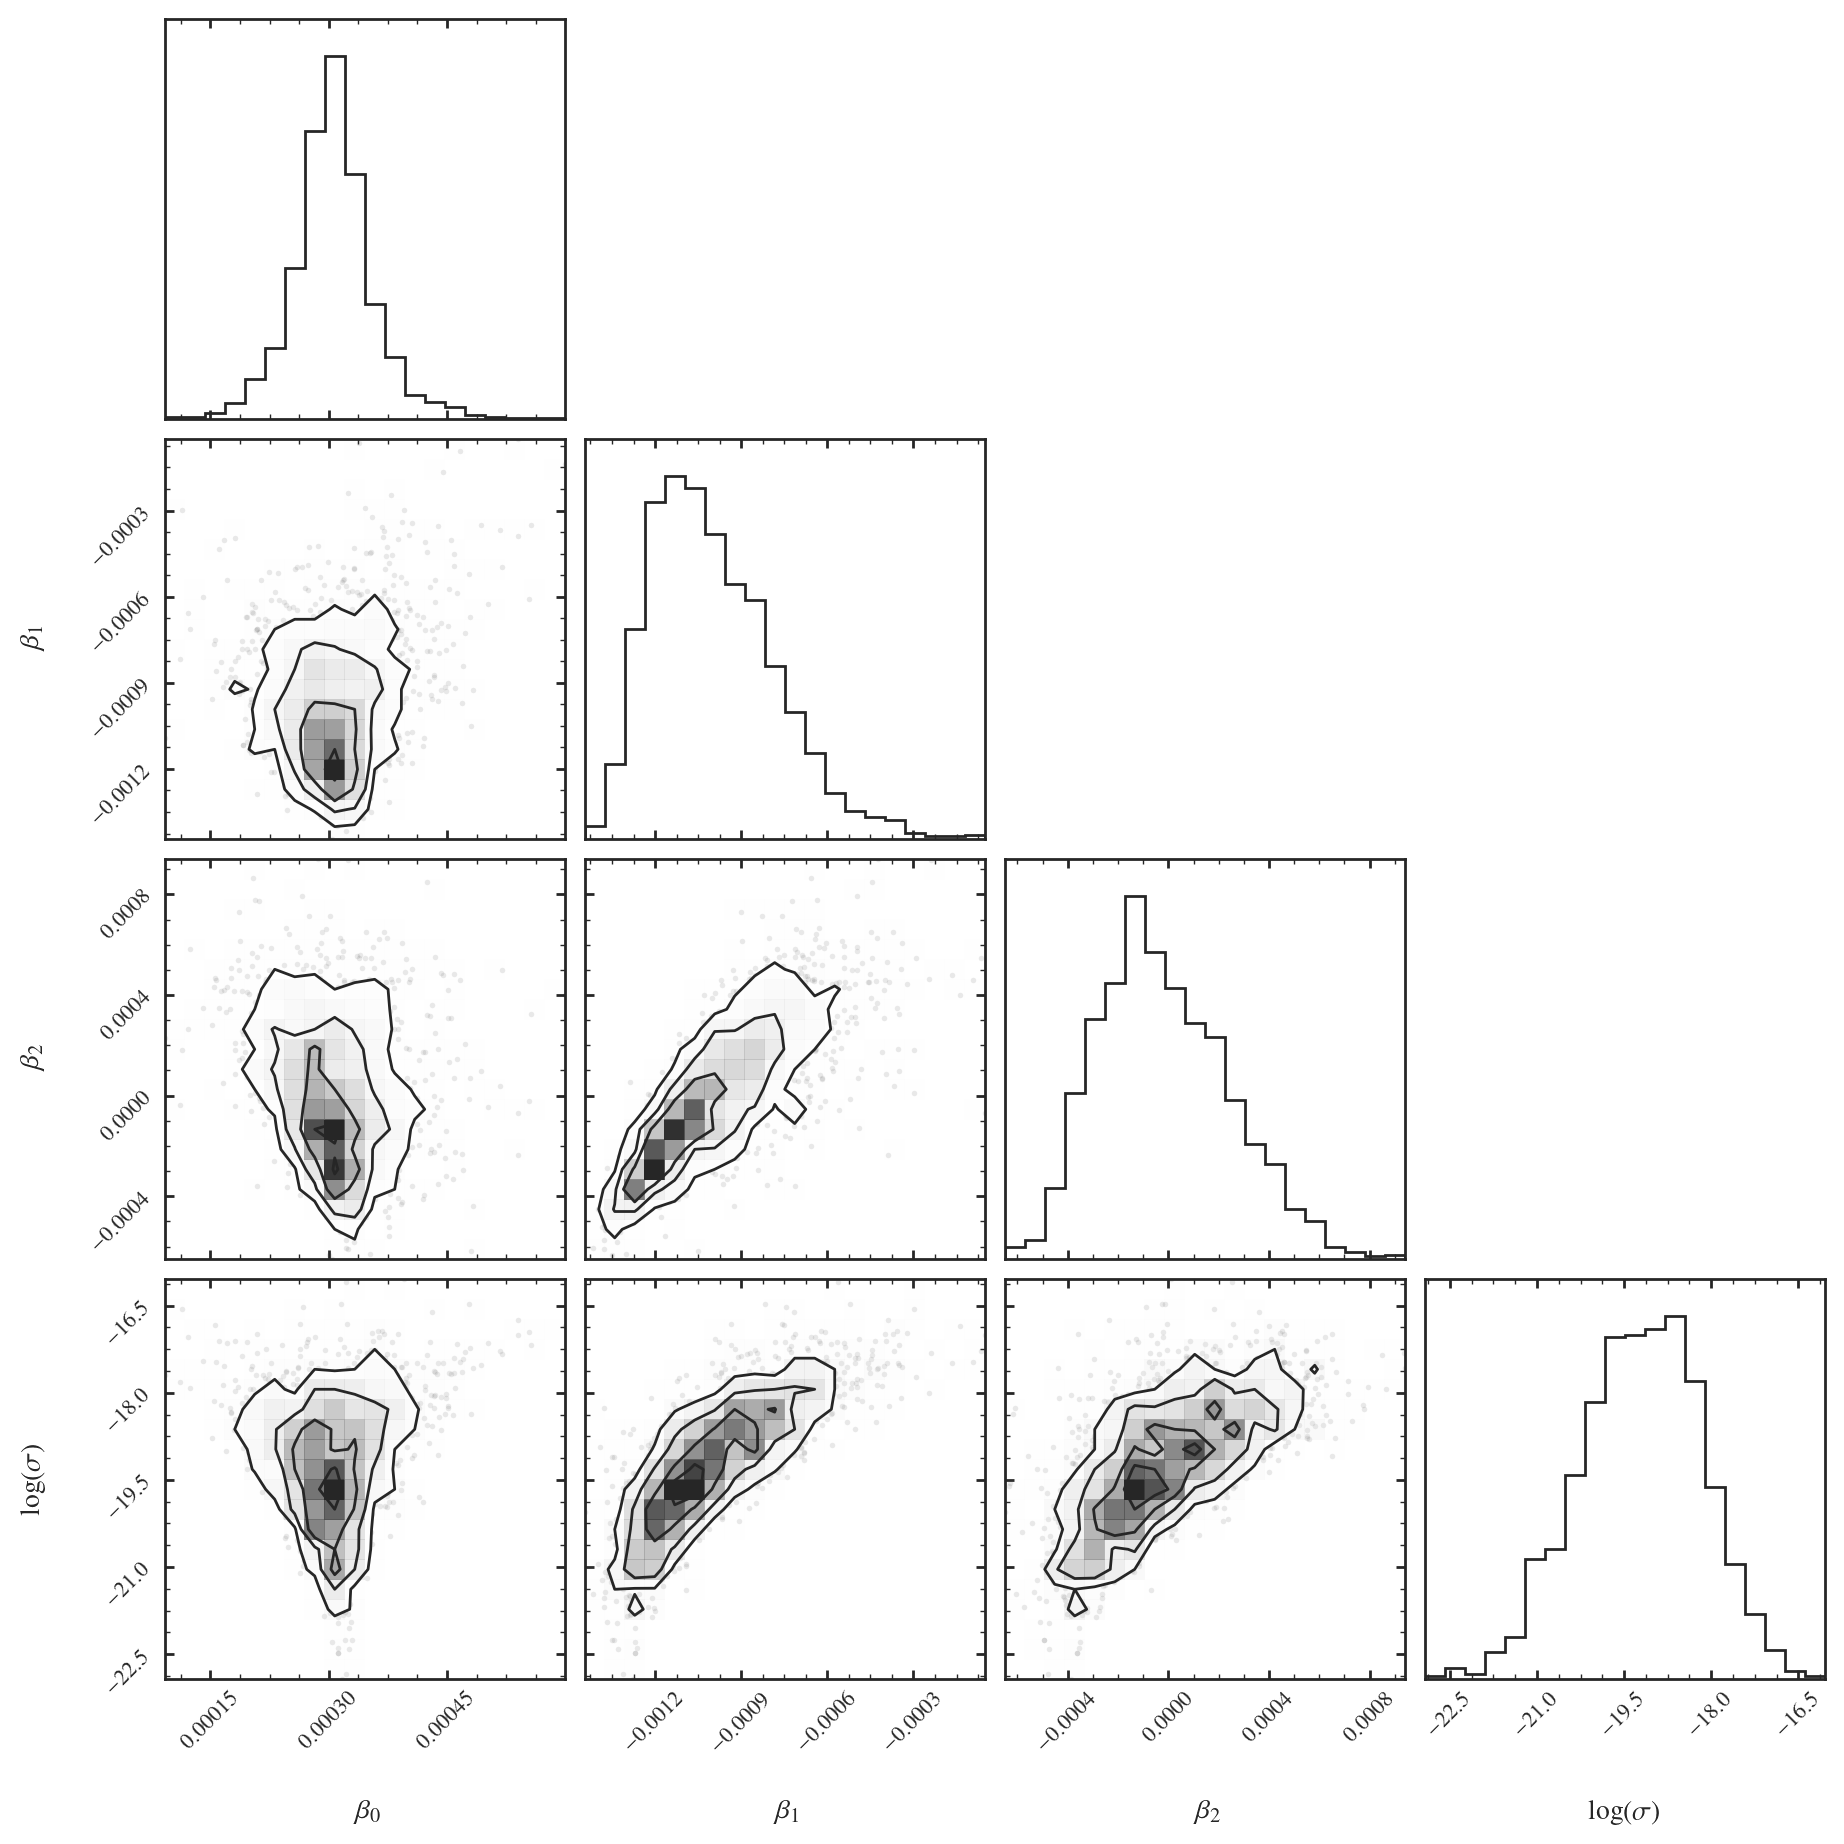

In [33]:
samples = mcmc_utils.run_mcmc(quad_model, obs, N=N, discard=discard)

$\beta_0$ = 3.05e-04 + 4.38e-05 - 4.35e-05
$\beta_1$ = -1.03e-03 + 1.77e-04 - 2.45e-04
$\beta_2$ = -4.80e-05 + 2.26e-04 - 2.99e-04
$\log(\sigma)$ = -1.92e+01 + 1.08e+00 - 9.89e-01


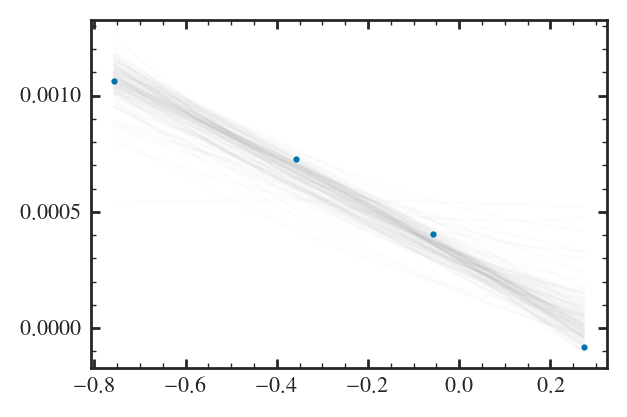

In [34]:
mcmc_utils.plot_posterior(quad_model, obs, samples)

100%|██████████| 3000/3000 [00:09<00:00, 322.66it/s]


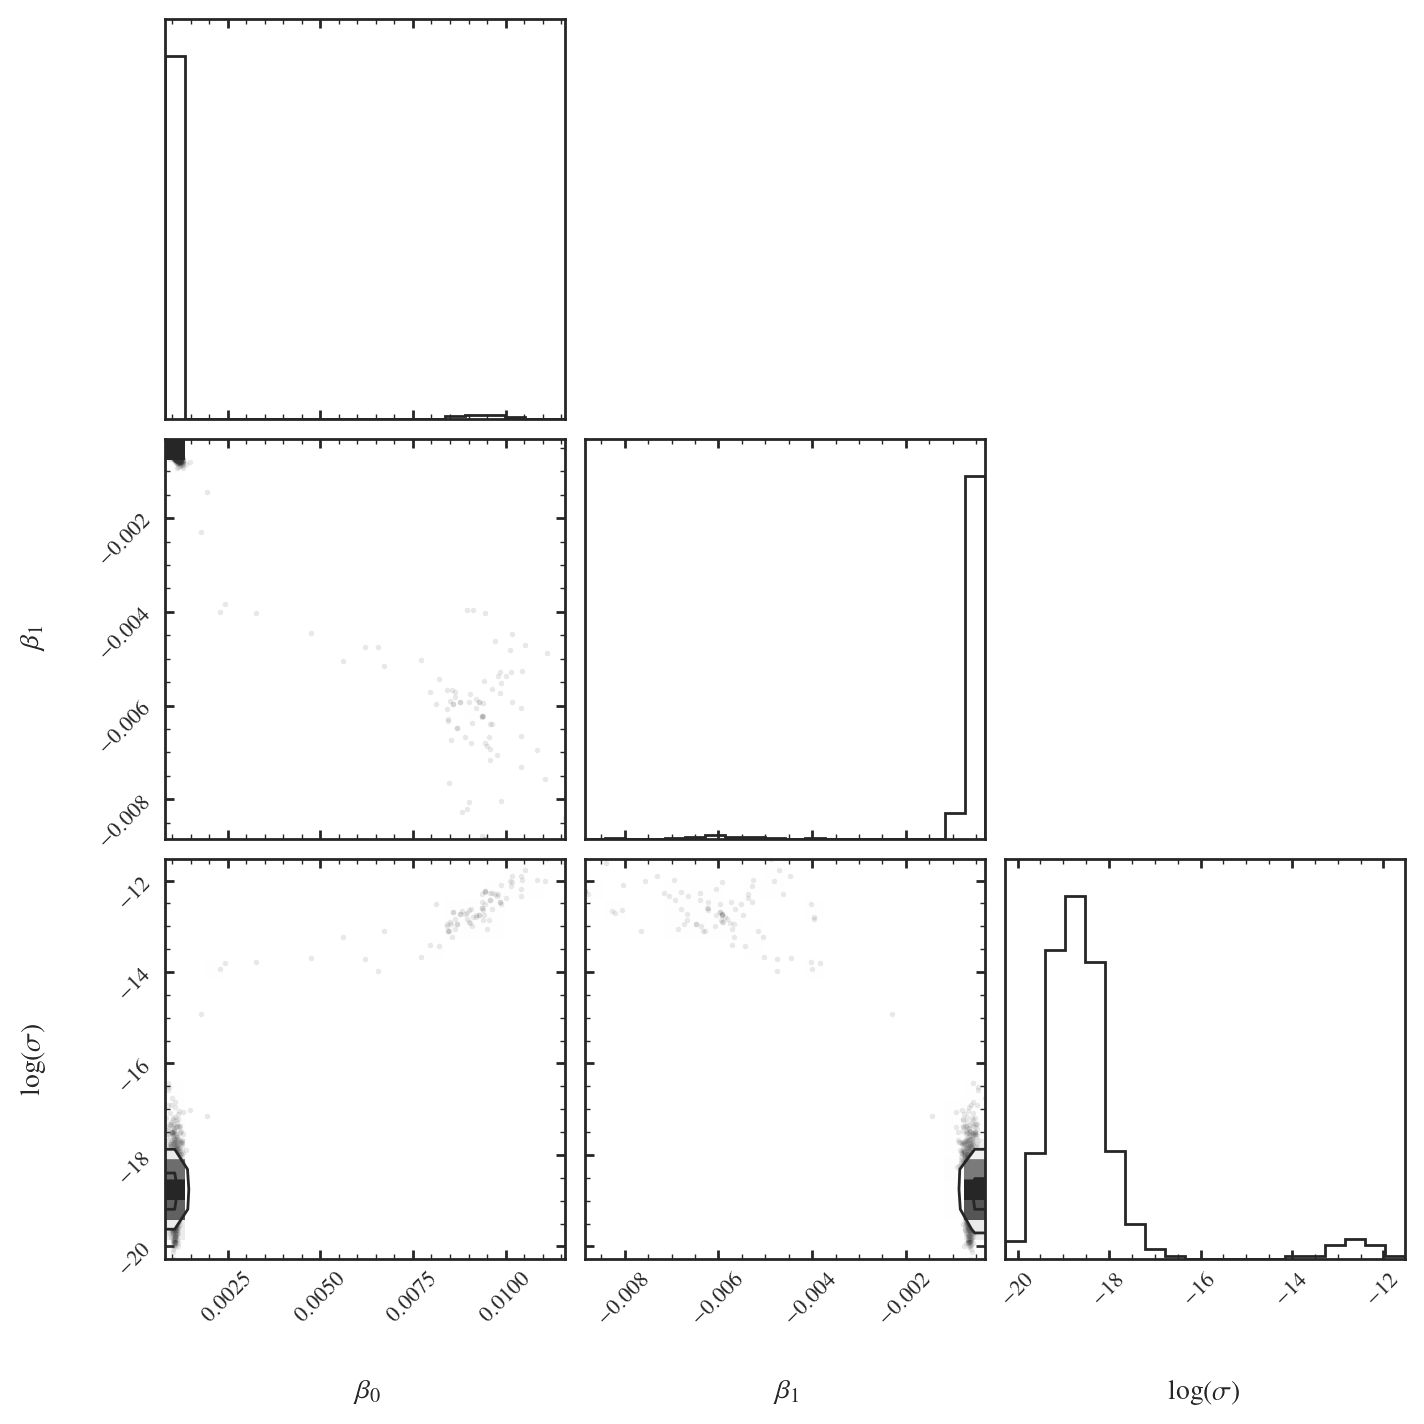

In [35]:
samples = mcmc_utils.run_mcmc(exp_model, obs, N=N, discard=discard)

$\beta_0$ = 1.07e-03 + 7.24e-05 - 7.66e-05
$\beta_1$ = -6.43e-04 + 7.82e-05 - 6.89e-05
$\log(\sigma)$ = -1.87e+01 + 5.60e-01 - 6.36e-01


(-0.001, 0.002)

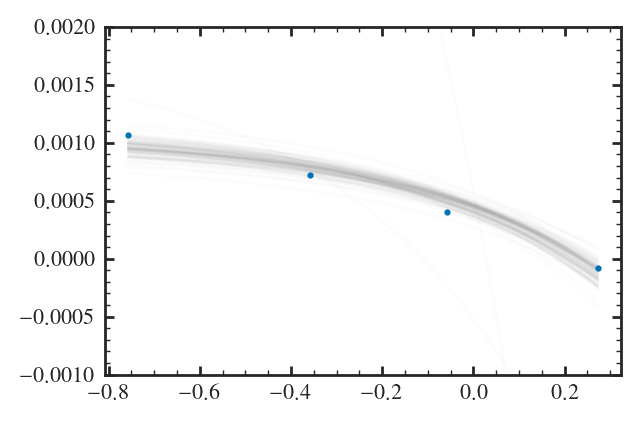

In [36]:
mcmc_utils.plot_posterior(exp_model, obs, samples)
plt.ylim(-1e-3, 2e-3)

# P16

In [37]:
obs = get_yield_table("pignatari16")

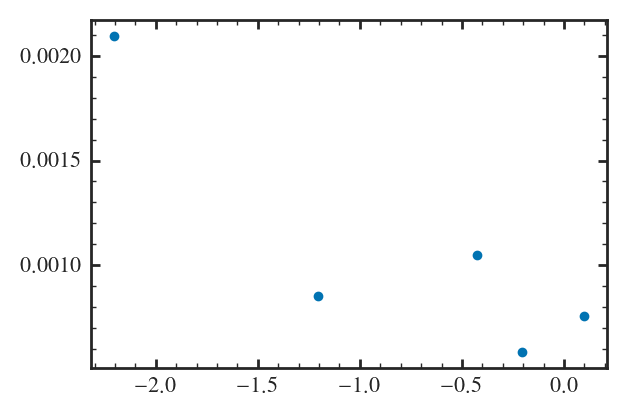

In [38]:
plt.scatter(obs[0], obs[1])

100%|██████████| 3000/3000 [00:08<00:00, 337.99it/s]


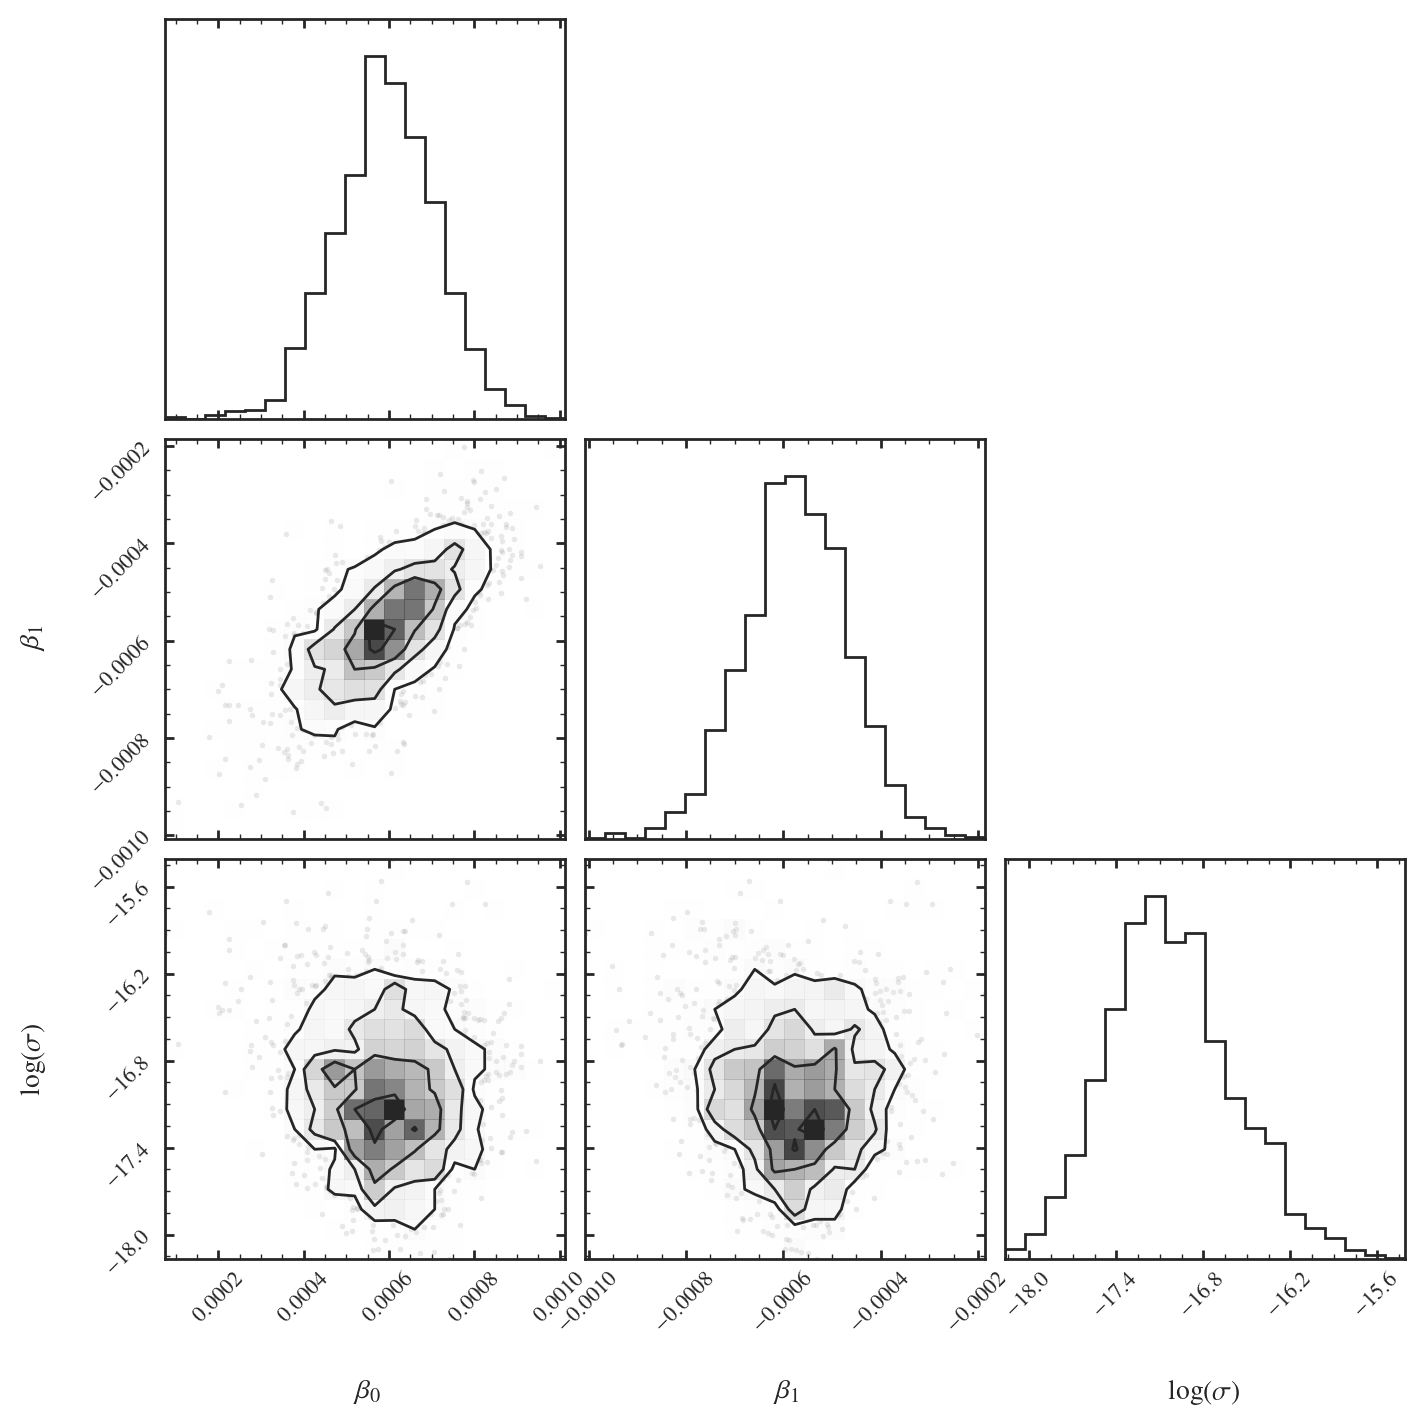

In [39]:
samples = mcmc_utils.run_mcmc(lin_model, obs, N=N, discard=discard)

$\beta_0$ = 5.94e-04 + 1.20e-04 - 1.11e-04
$\beta_1$ = -5.74e-04 + 1.05e-04 - 1.04e-04
$\log(\sigma)$ = -1.71e+01 + 3.98e-01 - 4.80e-01


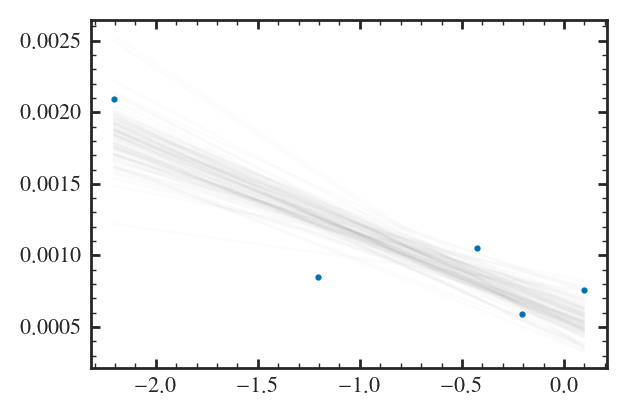

In [40]:
mcmc_utils.plot_posterior(lin_model, obs, samples)

In [ ]:
samples = mcmc_utils.run_mcmc(quad_model, obs, N=N, discard=discard)

 87%|████████▋ | 2611/3000 [00:09<00:01, 271.01it/s]

In [ ]:
mcmc_utils.plot_posterior(quad_model, obs, samples)
plt.ylim(-0.3e-3, 3e-3)

In [ ]:
samples = mcmc_utils.run_mcmc(exp_model, obs, N=N, discard=discard)

In [ ]:
mcmc_utils.plot_posterior(exp_model, obs, samples)
plt.ylim(-0.3e-3, 3e-3)

In [ ]:
obs = get_yield_table("pignatari16")
#obs = (obs[0][1:], obs[1][1:], None, None)

In [ ]:
plt.scatter(obs[0], obs[1])

In [ ]:
samples = mcmc_utils.run_mcmc(lin_model, obs, N=N, discard=discard)

In [ ]:
mcmc_utils.plot_posterior(lin_model, obs, samples)